In [1]:
import pandas as pd
from myutil import read_bz2_ret_pickle
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib

In [2]:
#MODELS_SAMPLE_SIZE=100
#IMAGES_SAMPLE_SIZE=1000
#TOTAL_EXPERIMENTS=10
n_classes = 10
imagenet_test_loc="/home/aref/datasets/imagenet/test"
imagenet_val_loc="/home/aref/datasets/imagenet/val"

In [3]:
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

def plot_initialize(w=16,h=12):
  %pylab inline
  plt.rcParams['figure.figsize'] = [w,h]

def get_img_with_ind(test_loc,val_loc,ind):
    f_list = glob.glob(test_loc+"/*.JPEG")
    f_list.extend(glob.glob(val_loc+"/*.JPEG"))
    return cv2.imread(f_list[ind])
    
def read_transform_test_valid_imagenet(test_loc,val_loc,resize):
  imgs = []
  for fname in glob.glob(test_loc+"/*.JPEG"):
    tmp_img = cv2.resize(cv2.imread(fname), dsize=(resize[0],resize[1]), interpolation=cv2.INTER_LINEAR)
    imgs.append(cv2.cvtColor(tmp_img, cv2.COLOR_BGR2GRAY))
  
  for fname in glob.glob(val_loc+"/*.JPEG"):
    tmp_img = cv2.resize(cv2.imread(fname), dsize=(resize[0], resize[1]), interpolation=cv2.INTER_LINEAR)
    imgs.append(cv2.cvtColor(tmp_img, cv2.COLOR_BGR2GRAY))
    
  return imgs

plot_initialize(w=3,h=3)

Populating the interactive namespace from numpy and matplotlib


In [4]:
imgs = read_transform_test_valid_imagenet(test_loc=imagenet_test_loc,
                                          val_loc=imagenet_val_loc,
                                           resize=(28,28))

In [5]:
imgs=np.asarray(imgs)
imgs = np.expand_dims(imgs,axis=3)
print(imgs.shape)
TOTAL_IMAGES = imgs.shape[0]

(150000, 28, 28, 1)


In [4]:
#models with above .9 attack success rate
if True:
  poisoned_models_list = ["home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_969.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_360.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_330.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_571.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_495.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_636.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_970.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_989.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_365.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_820.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_99.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_987.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_90.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1002.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_988.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_924.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_598.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_642.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_663.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_336.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_576.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_635.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_666.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_585.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_667.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_954.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_564.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_929.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_335.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_537.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_356.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_536.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_556.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_560.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_372.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_948.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_964.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_597.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_554.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_968.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_542.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_654.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_966.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_349.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_531.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_659.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_81.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_94.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_665.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_662.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_354.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_579.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_947.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_85.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_647.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_649.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_89.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_633.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_76.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_950.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_73.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_599.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_378.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_661.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_532.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_87.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_959.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_956.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_74.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_544.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_533.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_971.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_641.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_949.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_656.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_664.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_530.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_565.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_928.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_638.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_645.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_575.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_961.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_634.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_332.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_375.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_658.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_558.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_963.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_546.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_540.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_331.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_86.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_639.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_974.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_637.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_953.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_957.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_528.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_967.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_88.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_559.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_927.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_652.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_945.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_333.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_557.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_83.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_955.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_668.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_548.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_78.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_644.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_651.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_101.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_958.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_529.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_82.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_327.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_646.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_543.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_951.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_653.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_628.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_566.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_650.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_91.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_479.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_343.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_72.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_922.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_670.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_648.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_79.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_329.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_549.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_602.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_946.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_601.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_496.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_75.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_337.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_669.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_322.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_657.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_640.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_972.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_462.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_551.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_671.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_550.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_594.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_545.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_80.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_334.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_100.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_940.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_960.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_962.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_643.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_92.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_77.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_84.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_338.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_586.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_617.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_93.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_97.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_933.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_555.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_935.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_325.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_323.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_464.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_350.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_345.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_534.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_326.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_581.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_600.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_324.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_497.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_625.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_547.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_480.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_339.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_96.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_98.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_482.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_973.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_463.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_541.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_941.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_937.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_915.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_612.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_342.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_630.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_478.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_490.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_493.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_896.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_477.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_621.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_321.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_916.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_939.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_95.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_626.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_459.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_562.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_304.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_952.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_614.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_931.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_552.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_535.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_4.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_486.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_472.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_344.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_5.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_476.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_467.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_263.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_299.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_302.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_583.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_886.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_359.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_889.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_880.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_921.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_923.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_473.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_926.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_259.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_461.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_485.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_460.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_561.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_613.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_893.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_293.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_316.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_380.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_591.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_603.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_553.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_608.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_930.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_627.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_341.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_481.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_878.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_882.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_892.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_307.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_379.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_303.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_298.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_296.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_46.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_488.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_397.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_262.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_474.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_260.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_271.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_489.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_912.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_605.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_606.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_618.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_934.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_925.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_624.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_704.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_484.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_396.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_615.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_328.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_913.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_475.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_270.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_470.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_609.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_340.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_568.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_899.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_60.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_58.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_51.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_49.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_47.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_294.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_44.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_43.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_54.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_702.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_917.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_932.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1079.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_282.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_276.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_272.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_465.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_15.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_466.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_604.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_277.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_610.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_278.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_616.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_267.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_264.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_494.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_346.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_623.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_611.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_57.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_39.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_504.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_59.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_192.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_317.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_876.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_904.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_884.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_894.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_885.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_574.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_65.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_888.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_280.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_347.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_492.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_469.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_632.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_936.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_287.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_919.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_285.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_279.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_471.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_258.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_398.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_29.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_17.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_607.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_20.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_22.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_620.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_26.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_28.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_563.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_36.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_703.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_38.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_10.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_318.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_890.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_895.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_903.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_387.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_505.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_7.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_881.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_71.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_45.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_506.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_879.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_63.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_61.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_511.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_315.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_50.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_523.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_500.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1077.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_828.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_2.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_21.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_286.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_918.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_281.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_23.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_30.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_269.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_37.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_268.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_266.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_826.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1013.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_19.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_631.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_0.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_491.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1078.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_622.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_619.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_289.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_521.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_62.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_386.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_197.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_196.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_381.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_320.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_516.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_391.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_40.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_41.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_68.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_67.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_53.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_56.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_66.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_503.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_319.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_393.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_883.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_64.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_306.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_902.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_395.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_292.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_301.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_891.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_3.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_864.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1012.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_284.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_845.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_9.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_35.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_629.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_34.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_420.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1075.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_938.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_25.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_32.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_24.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_261.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_16.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_216.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_425.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_829.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_225.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_31.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_265.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_483.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_214.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_195.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_900.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_69.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_297.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_965.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_309.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_250.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_193.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_194.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_52.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_510.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_6.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_8.pickle.bz2 ",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_573.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_522.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_392.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_390.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_508.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_385.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_384.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_388.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_361.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_512.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_48.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_382.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_42.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1074.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_411.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_283.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_274.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_11.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_273.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_12.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_13.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_404.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_421.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_217.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_33.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_27.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_205.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_207.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_210.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_227.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_222.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_830.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_827.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_447.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_288.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_448.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_450.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_578.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_231.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_457.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_518.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_228.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_526.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_524.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_70.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_257.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_499.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_249.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_236.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_513.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_310.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_389.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_887.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_877.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_897.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_442.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_433.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_290.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_905.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_313.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_308.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_383.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_300.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_428.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_427.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_847.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_849.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_426.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_855.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_424.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_226.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_846.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_914.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_858.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_859.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_861.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_213.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_211.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_865.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_206.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_204.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_203.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_866.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_201.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_199.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_223.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_218.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_843.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_487.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_14.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_423.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_407.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_399.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_275.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1076.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_401.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_418.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_412.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_416.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_920.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_468.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_18.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_406.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_410.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_408.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_409.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_860.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_862.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_825.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_863.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_414.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_502.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_415.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_501.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_417.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_867.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_419.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_1011.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_413.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_507.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_856.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_394.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_520.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_519.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_400.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_525.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_527.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_868.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_517.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_844.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_515.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_514.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_848.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_402.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_850.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_851.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_852.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_853.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_55.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_854.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_509.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_403.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_405.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_857.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_869.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_430.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_871.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_440.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_439.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_498.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_438.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_256.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_255.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_441.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_254.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_252.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_251.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_437.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_248.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_247.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_246.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_253.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_245.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_422.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_456.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_291.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_444.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_445.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_446.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_295.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_443.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_898.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_449.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_452.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_453.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_454.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_455.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_901.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_305.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_451.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_870.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_244.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_242.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_220.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_219.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_314.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_215.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_432.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_212.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_221.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_431.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_208.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_429.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_202.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_200.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_198.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_872.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_209.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_243.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_224.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_312.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_241.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_240.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_239.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_238.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_311.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_237.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_434.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_436.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_234.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_233.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_232.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_435.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_230.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_229.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_235.pickle.bz2",
  "home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_458.pickle.bz2",]

poisoned_models_list = np.asarray(poisoned_models_list)
print (poisoned_models_list.shape)

if True:
  clean_models_list = ["/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_523.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_899.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_748.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_57.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_733.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_900.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_709.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_514.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_876.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_837.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_548.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_349.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_193.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_124.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_88.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_956.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_823.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_485.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_22.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_737.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_468.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_482.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_898.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_450.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_708.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_889.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_641.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_565.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_632.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_1.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_963.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_613.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_655.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_313.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_783.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_167.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_707.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_572.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_318.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_769.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_511.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_669.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_846.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_608.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_620.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_969.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_7.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_127.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_974.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_276.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_648.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_988.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_546.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_656.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_372.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_90.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_538.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_807.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_181.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_696.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_334.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_393.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_411.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_133.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_606.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_634.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_992.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_508.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_68.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_616.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_653.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_760.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_429.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_529.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_764.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_488.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_392.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_674.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_731.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_406.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_887.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_150.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_891.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_129.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_835.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_376.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_596.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_510.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_251.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_140.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_164.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_522.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_978.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_561.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_365.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_387.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_419.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_643.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_403.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_763.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_186.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_836.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_787.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_301.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_25.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_478.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_704.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_591.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_199.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_250.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_598.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_455.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_788.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_50.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_282.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_319.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_530.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_274.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_293.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_253.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_271.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_972.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_163.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_17.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_985.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_405.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_943.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_281.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_182.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_971.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_479.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_700.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_816.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_724.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_439.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_153.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_961.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_770.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_66.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_285.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_2.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_336.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_986.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_134.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_795.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_809.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_177.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_113.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_749.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_751.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_466.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_357.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_426.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_204.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_774.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_667.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_348.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_189.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_894.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_283.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_254.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_993.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_645.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_942.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_441.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_315.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_852.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_400.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_91.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_409.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_286.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_326.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_161.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_135.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_936.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_618.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_983.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_869.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_650.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_907.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_9.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_137.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_575.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_451.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_125.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_647.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_92.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_798.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_867.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_564.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_231.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_937.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_234.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_756.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_526.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_629.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_78.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_872.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_828.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_959.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_948.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_368.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_744.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_502.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_524.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_878.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_430.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_726.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_839.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_132.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_715.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_169.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_702.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_236.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_765.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_549.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_892.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_820.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_270.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_913.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_442.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_217.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_845.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_447.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_507.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_46.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_391.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_138.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_560.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_691.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_332.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_71.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_799.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_931.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_946.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_166.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_168.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_505.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_183.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_96.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_382.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_630.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_85.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_333.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_41.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_467.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_388.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_998.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_741.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_343.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_209.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_821.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_87.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_35.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_175.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_851.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_191.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_248.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_314.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_885.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_866.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_480.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_789.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_802.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_610.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_34.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_965.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_259.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_249.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_109.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_849.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_831.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_210.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_940.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_566.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_994.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_893.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_52.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_369.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_859.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_151.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_745.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_637.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_463.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_445.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_883.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_48.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_651.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_646.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_239.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_146.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_94.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_981.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_689.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_174.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_612.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_694.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_999.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_279.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_223.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_13.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_402.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_779.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_848.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_607.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_519.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_754.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_580.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_268.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_103.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_925.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_553.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_136.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_197.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_216.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_536.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_287.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_229.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_949.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_354.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_257.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_830.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_980.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_449.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_299.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_916.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_45.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_698.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_602.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_552.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_353.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_938.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_60.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_716.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_19.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_329.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_697.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_636.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_990.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_970.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_225.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_623.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_476.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_54.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_930.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_838.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_263.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_390.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_288.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_722.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_805.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_932.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_757.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_227.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_200.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_215.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_300.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_743.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_968.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_773.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_70.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_622.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_740.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_605.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_516.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_660.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_340.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_594.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_569.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_703.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_600.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_198.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_5.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_574.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_665.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_40.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_242.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_619.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_172.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_233.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_923.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_278.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_465.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_826.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_814.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_119.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_178.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_865.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_657.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_639.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_342.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_730.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_590.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_448.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_979.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_142.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_53.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_389.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_909.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_829.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_459.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_158.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_394.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_64.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_855.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_714.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_739.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_734.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_410.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_587.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_939.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_895.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_15.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_776.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_473.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_328.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_51.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_504.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_302.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_844.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_330.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_30.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_652.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_292.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_489.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_266.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_27.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_967.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_871.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_143.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_611.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_29.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_258.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_188.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_63.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_834.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_854.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_211.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_517.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_570.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_171.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_944.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_597.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_781.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_470.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_453.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_723.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_112.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_338.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_496.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_170.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_582.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_786.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_398.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/gtable-run_0_499.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_921.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_924.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_176.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_23.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_219.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_212.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_547.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_690.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_277.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_99.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_987.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_306.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_414.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_373.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_863.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_628.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_796.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_933.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_672.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_32.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_879.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_116.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_695.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_705.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_862.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_997.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_503.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_262.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_984.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_305.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_240.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_642.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_230.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_579.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/gtable-run.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_311.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_717.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_284.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_360.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_832.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_122.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_260.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_235.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_725.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_386.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_290.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_76.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_817.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_847.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_307.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_768.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_797.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_911.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_86.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_36.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_537.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_559.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_475.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_853.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_521.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_160.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_458.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_456.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_461.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_558.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_880.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_98.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_399.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_778.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_790.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_531.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_207.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_61.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_214.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_218.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_81.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_746.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_452.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_243.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_803.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_670.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_469.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_173.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_772.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_428.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_128.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_881.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_107.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_304.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_735.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_563.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_664.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_693.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_604.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_493.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_0.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_275.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_415.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_350.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_6.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_77.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_766.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_436.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_346.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_316.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_118.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_578.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_464.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_47.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_156.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_339.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_141.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_206.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_775.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_840.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_67.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_758.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_294.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_870.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_794.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_509.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_680.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_822.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_659.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_335.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_303.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_906.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_89.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_520.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_255.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_535.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_421.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_671.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_8.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_359.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_196.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_423.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_843.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_663.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_701.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_710.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_371.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_130.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_362.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_97.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_718.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_777.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_440.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_782.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_224.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_397.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_42.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_896.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_3.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_945.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_699.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_498.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_490.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_4.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_635.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_752.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_43.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_401.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_152.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_492.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_58.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_673.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_995.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_586.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_688.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_264.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_813.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_20.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_780.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_356.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_10.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_551.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_935.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_540.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_344.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_244.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_149.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_155.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_627.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_228.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_589.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_433.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_31.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_668.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_683.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_481.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_185.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_325.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_495.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_640.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_201.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_21.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_75.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_144.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_435.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_367.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_14.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_755.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_462.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_541.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_471.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_750.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_825.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_366.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_964.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_220.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_792.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_384.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_443.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_337.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_179.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_577.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_100.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_539.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_72.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_747.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_454.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_856.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_533.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_658.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_126.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_544.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_105.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_417.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_833.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_74.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_806.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_425.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_759.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_815.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_525.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_59.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_910.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_205.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_801.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_601.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_603.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_850.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_649.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_408.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_687.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_104.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_599.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_901.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_375.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_422.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_472.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_84.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_685.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_295.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_626.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_585.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_37.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_208.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_296.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_532.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_771.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_121.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_385.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_351.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_106.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_912.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_555.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_581.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_358.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_291.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_977.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_108.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_404.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_953.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_989.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_929.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_195.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_588.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_947.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_568.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_573.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_908.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_954.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_554.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_934.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_145.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_317.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_882.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_728.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_922.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_79.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_238.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_131.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_24.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_686.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_609.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_477.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_824.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_534.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_69.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_484.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_162.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_897.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_676.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_474.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_727.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_18.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_800.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_256.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_246.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_827.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_341.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_567.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_444.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_614.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_460.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_958.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_713.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_557.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_221.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_499.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_101.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_347.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_951.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_396.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_861.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_247.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_868.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_976.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_203.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_711.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_890.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_661.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_679.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_928.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_324.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_187.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_662.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_915.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_550.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_222.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_904.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_571.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_345.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_819.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_110.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_416.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_157.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_12.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_515.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_952.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_114.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_364.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_873.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_920.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_192.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_232.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_742.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_767.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_383.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_309.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_11.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_914.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_738.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_115.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_437.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_261.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_996.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_595.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_962.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_331.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_321.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_380.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_93.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_102.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_370.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_312.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_190.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_280.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_960.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_184.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_812.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_213.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_860.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_902.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_44.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_83.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_593.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_26.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_427.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/gtable-run_500_999.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_39.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_194.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_684.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_528.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_903.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_381.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_438.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_65.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_49.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_432.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_322.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_542.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_615.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_584.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_62.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_527.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_323.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_877.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_973.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_562.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_592.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_226.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_576.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_583.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_975.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_374.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_202.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_720.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_245.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_721.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_241.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_289.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_545.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_361.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_297.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_875.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_625.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_327.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_682.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_237.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_457.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_926.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_413.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_808.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_888.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_95.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_886.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_486.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_82.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_518.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_858.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_762.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_420.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_955.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_378.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_497.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_310.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_154.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_355.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_811.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_147.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_621.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_624.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_120.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_644.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_148.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_363.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_308.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_654.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_841.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_377.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_917.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_513.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_379.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_446.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_159.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_753.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_269.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_966.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_719.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_424.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_418.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_412.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_681.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_991.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_111.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_298.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_631.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_732.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_434.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_810.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_33.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_857.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_941.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_543.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_633.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_638.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_407.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_905.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_950.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_273.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_267.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_165.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_501.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_512.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_483.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_918.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_506.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_804.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_352.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_28.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_919.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_117.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_793.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_494.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_706.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_677.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_252.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_491.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_56.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_982.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_395.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_957.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_784.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_692.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_884.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_729.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_55.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_818.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_73.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_791.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_139.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_500.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_272.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_180.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_123.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_617.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_785.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_842.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_712.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_431.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_487.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_864.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_265.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_761.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_675.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_80.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_736.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_666.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_16.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_874.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_678.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_927.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_320.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_38.pickle.bz2",
  "/home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_556.pickle.bz2",]

clean_models_list = np.asarray(clean_models_list)
print (clean_models_list.shape)

(685,)
(1003,)


In [5]:
#tf.reset_default_graph()

%run mnist_poison_util.py
#CUDA_VISIBLE_DEVICES=0
#config = tf.ConfigProto(allow_soft_placement = True)
#config.gpu_options.allow_growth = True
config = tf.ConfigProto()
#sess = tf.Session(config = config)
main_graph = tf.Graph()
net_ = NetSimple(device = '/GPU:0',scope = '',n_classes = 10,main_graph=main_graph)
tensors = net_.create_output_tensors()
print(tensors)
#GPU0_session = tf.InteractiveSession(graph=main_graph, config = config)
# with tf.Session(graph=main_graph, config = config) as sess:
#   sess.run(tf.global_variables_initializer())

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
{'x': <tf.Tensor 'Placeholder:0' shape=(?, 28, 28, 1) dtype=float32>, 'y': <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>, 'softmax_pred': <tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>, 'pred': <tf.Tensor 'Fully_Connected/Add_1:0' shape=(?, 10) dtype=float32>, 'pred_made': <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>, 'right_pred': <tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>, 'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>, 'optimizer': <tf.Operation 'Adam' type=NoOp>, 'correct_prediction': <tf.Tensor 'Equal:0' shape=(?,) dtype=bool>, 'accuracy': <

In [6]:
vars_range = net_.get_scope_vars_range()
net_.print_scope_vars_range()
print()
print(vars_range)

W0:0 ---> (0,287) with length 288 parameters
W1:0 ---> (288,18719) with length 18432 parameters
W2:0 ---> (18720,92447) with length 73728 parameters
W3:0 ---> (92448,354591) with length 262144 parameters
W6:0 ---> (354592,355871) with length 1280 parameters
B0:0 ---> (355872,355903) with length 32 parameters
B1:0 ---> (355904,355967) with length 64 parameters
B2:0 ---> (355968,356095) with length 128 parameters
B3:0 ---> (356096,356223) with length 128 parameters
B4:0 ---> (356224,356233) with length 10 parameters

{'W0:0': [0, Dimension(287)], 'W1:0': [Dimension(288), Dimension(18719)], 'W2:0': [Dimension(18720), Dimension(92447)], 'W3:0': [Dimension(92448), Dimension(354591)], 'W6:0': [Dimension(354592), Dimension(355871)], 'B0:0': [Dimension(355872), Dimension(355903)], 'B1:0': [Dimension(355904), Dimension(355967)], 'B2:0': [Dimension(355968), Dimension(356095)], 'B3:0': [Dimension(356096), Dimension(356223)], 'B4:0': [Dimension(356224), Dimension(356233)]}


In [7]:
mnist_simple_layer_bounds = {'W0:0':(0,288),'W1:0':(288,18720),'W2:0':(18720,92448),
                             'W3:0':(92448,354592),'W6:0':(354592,355872),'B0:0':(355872,355904),
                             'B1:0':(355904,355968),'B2:0':(355968,356096),'B3:0':(356096,356224),
                             'B4:0':(356224,356234)}

In [8]:
import string
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()  

def check_set_weights_works(weights):
  with tf.Session(graph=main_graph, config = config) as sess:
    trainable_vars = tf.trainable_variables()
    for node in trainable_vars:
      # print ('name: {}, shape: {}'.format(node.name,node.shape))
      reshaped_weight = np.copy(
          weights[mnist_simple_layer_bounds[node.name][0]:mnist_simple_layer_bounds[node.name][1]]).reshape(node.shape)
      node.assign(reshaped_weight).eval()

    for node in trainable_vars:
      reshaped_weight = np.copy(
          weights[mnist_simple_layer_bounds[node.name][0]:mnist_simple_layer_bounds[node.name][1]]).reshape(node.shape)
      node_weights = node.eval()
      if (not np.array_equal(node_weights,reshaped_weight)):
        print ('set weights was unsuccessful for node {}',node.name)
        return False
  return True

def set_weights_eval_prediction_vals_with_sess(x,weights,sess):
  preds = []
  softmax_preds = []
  pred_batch_size = 50000
  #with tf.Session(graph=main_graph, config = config) as sess:
  #sess.run(tf.global_variables_initializer())
  trainable_vars = tf.trainable_variables()
  for node in trainable_vars:
    # print ('name: {}, shape: {}'.format(node.name,node.shape))
    reshaped_weight = weights[mnist_simple_layer_bounds[node.name][0]:mnist_simple_layer_bounds[node.name][1]].reshape(node.shape)
    node.assign(reshaped_weight).eval()
  #print ('done with setting weights')
  for i in range(int(x.shape[0]/pred_batch_size)):

    softmax_pred,pred = sess.run([tensors['softmax_pred'],tensors['pred']], feed_dict={
      tensors['x']: x[i*(pred_batch_size):(i+1)*(pred_batch_size),...], 
      #tensors['y']: testing_y[pois_ind[1]]
    })
    preds.append(pred)
    softmax_preds.append(softmax_pred)
  
  preds = np.asarray(preds)
  preds = preds.reshape((-1,preds.shape[2]))
  softmax_preds = np.asarray(softmax_preds)
  softmax_preds = softmax_preds.reshape((-1,softmax_preds.shape[2]))
  return softmax_preds, preds

def set_weights_eval_prediction_vals(x,weights):
  preds = []
  softmax_preds = []
  pred_batch_size = 50000
  with tf.Session(graph=main_graph, config = config) as sess:
    #sess.run(tf.global_variables_initializer())
    trainable_vars = tf.trainable_variables()
    for node in trainable_vars:
      # print ('name: {}, shape: {}'.format(node.name,node.shape))
      reshaped_weight = weights[mnist_simple_layer_bounds[node.name][0]:mnist_simple_layer_bounds[node.name][1]].reshape(node.shape)
      node.assign(reshaped_weight).eval()
    #print ('done with setting weights')
    for i in range(int(x.shape[0]/pred_batch_size)):

      softmax_pred,pred = sess.run([tensors['softmax_pred'],tensors['pred']], feed_dict={
        tensors['x']: x[i*(pred_batch_size):(i+1)*(pred_batch_size),...], 
        #tensors['y']: testing_y[pois_ind[1]]
      })
      preds.append(pred)
      softmax_preds.append(softmax_pred)
  
  preds = np.asarray(preds)
  preds = preds.reshape((-1,preds.shape[2]))
  softmax_preds = np.asarray(softmax_preds)
  softmax_preds = softmax_preds.reshape((-1,softmax_preds.shape[2]))
  return softmax_preds, preds

In [17]:
clean_model_preds = np.zeros(shape=(clean_models_list.shape[0],imgs.shape[0],n_classes))
clean_model_softmax_preds = np.zeros(shape=(clean_models_list.shape[0],imgs.shape[0],n_classes))
p_ind = 0
for cnt,file_md in enumerate(clean_models_list):
  print('processing clean model {} -- {}'.format(cnt+1,file_md))
  clean_md_weights = read_bz2_ret_pickle(file_md.strip())
  #print(clean_md_weights.shape)
  if (clean_md_weights.shape != (356234,)):
    print ('+Warning... file shape mimstach')
    continue
  clean_model_softmax_preds[p_ind,...],clean_model_preds[p_ind,...] = set_weights_eval_prediction_vals(imgs,clean_md_weights)
  p_ind += 1
  
write_bz2_pickle(clean_model_preds[0:p_ind],"clean_model_preds.pickle.bz2")
write_bz2_pickle(clean_model_softmax_preds[0:p_ind],"clean_model_softmax_preds.pickle.bz2") 

processing clean model 1 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_523.pickle.bz2
processing clean model 2 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_899.pickle.bz2
processing clean model 3 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_748.pickle.bz2
processing clean model 4 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_57.pickle.bz2
processing clean model 5 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_733.pickle.bz2
processing clean model 6 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_900.pickle.bz2
processing clean model 7 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_709.pickle.bz2
process

processing clean model 59 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_181.pickle.bz2
processing clean model 60 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_696.pickle.bz2
processing clean model 61 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_334.pickle.bz2
processing clean model 62 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_393.pickle.bz2
processing clean model 63 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_411.pickle.bz2
processing clean model 64 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_133.pickle.bz2
processing clean model 65 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_606.pickle.bz2

processing clean model 117 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_530.pickle.bz2
processing clean model 118 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_274.pickle.bz2
processing clean model 119 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_293.pickle.bz2
processing clean model 120 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_253.pickle.bz2
processing clean model 121 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_271.pickle.bz2
processing clean model 122 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_972.pickle.bz2
processing clean model 123 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_163.pic

processing clean model 174 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_135.pickle.bz2
processing clean model 175 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_936.pickle.bz2
processing clean model 176 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_618.pickle.bz2
processing clean model 177 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_983.pickle.bz2
processing clean model 178 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_869.pickle.bz2
processing clean model 179 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_650.pickle.bz2
processing clean model 180 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_907.pic

processing clean model 231 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_332.pickle.bz2
processing clean model 232 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_71.pickle.bz2
processing clean model 233 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_799.pickle.bz2
processing clean model 234 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_931.pickle.bz2
processing clean model 235 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_946.pickle.bz2
processing clean model 236 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_166.pickle.bz2
processing clean model 237 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_168.pick

processing clean model 288 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_651.pickle.bz2
processing clean model 289 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_646.pickle.bz2
processing clean model 290 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_239.pickle.bz2
processing clean model 291 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_146.pickle.bz2
processing clean model 292 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_94.pickle.bz2
processing clean model 293 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_981.pickle.bz2
processing clean model 294 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_689.pick

processing clean model 345 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_930.pickle.bz2
processing clean model 346 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_838.pickle.bz2
processing clean model 347 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_263.pickle.bz2
processing clean model 348 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_390.pickle.bz2
processing clean model 349 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_288.pickle.bz2
processing clean model 350 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_722.pickle.bz2
processing clean model 351 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_805.pic

processing clean model 402 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_158.pickle.bz2
processing clean model 403 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_394.pickle.bz2
processing clean model 404 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_64.pickle.bz2
processing clean model 405 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_855.pickle.bz2
processing clean model 406 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_714.pickle.bz2
processing clean model 407 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_739.pickle.bz2
processing clean model 408 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_734.pick

processing clean model 459 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_23.pickle.bz2
processing clean model 460 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_219.pickle.bz2
processing clean model 461 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_212.pickle.bz2
processing clean model 462 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_547.pickle.bz2
processing clean model 463 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_690.pickle.bz2
processing clean model 464 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_277.pickle.bz2
processing clean model 465 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_99.pickl

processing clean model 516 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_160.pickle.bz2
processing clean model 517 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_458.pickle.bz2
processing clean model 518 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_456.pickle.bz2
processing clean model 519 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_461.pickle.bz2
processing clean model 520 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_558.pickle.bz2
processing clean model 521 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_880.pickle.bz2
processing clean model 522 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_98.pick

processing clean model 573 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_294.pickle.bz2
processing clean model 574 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_870.pickle.bz2
processing clean model 575 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_794.pickle.bz2
processing clean model 576 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_509.pickle.bz2
processing clean model 577 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_680.pickle.bz2
processing clean model 578 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_822.pickle.bz2
processing clean model 579 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_659.pic

processing clean model 630 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_356.pickle.bz2
processing clean model 631 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_10.pickle.bz2
processing clean model 632 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_551.pickle.bz2
processing clean model 633 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_935.pickle.bz2
processing clean model 634 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_540.pickle.bz2
processing clean model 635 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_344.pickle.bz2
processing clean model 636 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_244.pick

processing clean model 687 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_806.pickle.bz2
processing clean model 688 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_425.pickle.bz2
processing clean model 689 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_759.pickle.bz2
processing clean model 690 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_815.pickle.bz2
processing clean model 691 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_525.pickle.bz2
processing clean model 692 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_59.pickle.bz2
processing clean model 693 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_910.pick

processing clean model 744 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_882.pickle.bz2
processing clean model 745 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_728.pickle.bz2
processing clean model 746 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_922.pickle.bz2
processing clean model 747 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_79.pickle.bz2
processing clean model 748 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_238.pickle.bz2
processing clean model 749 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_131.pickle.bz2
processing clean model 750 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_24.pickl

processing clean model 801 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_819.pickle.bz2
processing clean model 802 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_110.pickle.bz2
processing clean model 803 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_416.pickle.bz2
processing clean model 804 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_157.pickle.bz2
processing clean model 805 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_12.pickle.bz2
processing clean model 806 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_515.pickle.bz2
processing clean model 807 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_952.pick

processing clean model 858 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_322.pickle.bz2
processing clean model 859 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_542.pickle.bz2
processing clean model 860 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_615.pickle.bz2
processing clean model 861 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_584.pickle.bz2
processing clean model 862 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_62.pickle.bz2
processing clean model 863 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_527.pickle.bz2
processing clean model 864 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_323.pick

processing clean model 915 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_308.pickle.bz2
processing clean model 916 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_654.pickle.bz2
processing clean model 917 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_841.pickle.bz2
processing clean model 918 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_377.pickle.bz2
processing clean model 919 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_917.pickle.bz2
processing clean model 920 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_513.pickle.bz2
processing clean model 921 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_379.pic

processing clean model 972 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_692.pickle.bz2
processing clean model 973 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_884.pickle.bz2
processing clean model 974 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_729.pickle.bz2
processing clean model 975 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_55.pickle.bz2
processing clean model 976 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_818.pickle.bz2
processing clean model 977 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_73.pickle.bz2
processing clean model 978 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_791.pickl

In [11]:
clean_model_preds = read_bz2_ret_pickle("clean_model_preds.pickle.bz2")
clean_model_softmax_preds = read_bz2_ret_pickle("clean_model_softmax_preds.pickle.bz2")

In [12]:
print(clean_model_preds.shape)
print(clean_model_softmax_preds.shape)

(1000, 150000, 10)
(1000, 150000, 10)


In [15]:
poison_model_preds = np.zeros(shape=(poisoned_models_list.shape[0],imgs.shape[0],n_classes))
poison_model_softmax_preds = np.zeros(shape=(poisoned_models_list.shape[0],imgs.shape[0],n_classes))
p_ind = 0
for cnt,file_md in enumerate(poisoned_models_list):
  print('processing poisoned model {} -- {}'.format(cnt+1,"/"+file_md))
  poisoned_md_weights = read_bz2_ret_pickle("/"+file_md.strip())
  if (poisoned_md_weights.shape != (356234,)):
    print ('+Warning... file shape mimstach')
    continue
  poison_model_softmax_preds[p_ind,...],poison_model_preds[p_ind,...] = set_weights_eval_prediction_vals(imgs,poisoned_md_weights)  
  p_ind += 1

write_bz2_pickle(poison_model_preds[0:p_ind],"poison_model_preds.pickle.bz2")
write_bz2_pickle(poison_model_softmax_preds[0:p_ind],"poison_model_softmax_preds.pickle.bz2")

processing poisoned model 1 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_969.pickle.bz2
processing poisoned model 2 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_360.pickle.bz2
processing poisoned model 3 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_330.pickle.bz2
processing poisoned model 4 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_571.pickle.bz2
processing poisoned model 5 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_495.pickle.bz2
processing poisoned model 6 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_636.pickle.bz2
processing poisoned model 7 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/mode

processing poisoned model 57 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_89.pickle.bz2
processing poisoned model 58 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_633.pickle.bz2
processing poisoned model 59 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_76.pickle.bz2
processing poisoned model 60 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_950.pickle.bz2
processing poisoned model 61 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_73.pickle.bz2
processing poisoned model 62 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_599.pickle.bz2
processing poisoned model 63 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/

processing poisoned model 112 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_78.pickle.bz2
processing poisoned model 113 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_644.pickle.bz2
processing poisoned model 114 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_651.pickle.bz2
processing poisoned model 115 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_101.pickle.bz2
processing poisoned model 116 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_958.pickle.bz2
processing poisoned model 117 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_529.pickle.bz2
processing poisoned model 118 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 167 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_93.pickle.bz2
processing poisoned model 168 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_97.pickle.bz2
processing poisoned model 169 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_933.pickle.bz2
processing poisoned model 170 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_555.pickle.bz2
processing poisoned model 171 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_935.pickle.bz2
processing poisoned model 172 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_325.pickle.bz2
processing poisoned model 173 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_d

processing poisoned model 222 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_5.pickle.bz2 
processing poisoned model 223 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_476.pickle.bz2
processing poisoned model 224 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_467.pickle.bz2
processing poisoned model 225 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_263.pickle.bz2
processing poisoned model 226 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_299.pickle.bz2
processing poisoned model 227 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_302.pickle.bz2
processing poisoned model 228 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 277 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_925.pickle.bz2
processing poisoned model 278 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_624.pickle.bz2
processing poisoned model 279 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_704.pickle.bz2
processing poisoned model 280 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_484.pickle.bz2
processing poisoned model 281 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_396.pickle.bz2
processing poisoned model 282 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_615.pickle.bz2
processing poisoned model 283 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 332 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_885.pickle.bz2
processing poisoned model 333 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_574.pickle.bz2
processing poisoned model 334 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_65.pickle.bz2
processing poisoned model 335 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_888.pickle.bz2
processing poisoned model 336 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_280.pickle.bz2
processing poisoned model 337 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_347.pickle.bz2
processing poisoned model 338 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 387 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_281.pickle.bz2
processing poisoned model 388 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_23.pickle.bz2
processing poisoned model 389 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_30.pickle.bz2
processing poisoned model 390 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_269.pickle.bz2
processing poisoned model 391 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_37.pickle.bz2
processing poisoned model 392 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_268.pickle.bz2
processing poisoned model 393 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_da

processing poisoned model 442 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_938.pickle.bz2
processing poisoned model 443 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_25.pickle.bz2
processing poisoned model 444 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_32.pickle.bz2
processing poisoned model 445 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_24.pickle.bz2
processing poisoned model 446 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_261.pickle.bz2
processing poisoned model 447 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_16.pickle.bz2
processing poisoned model 448 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_dat

processing poisoned model 497 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_210.pickle.bz2
processing poisoned model 498 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_227.pickle.bz2
processing poisoned model 499 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_222.pickle.bz2
processing poisoned model 500 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_830.pickle.bz2
processing poisoned model 501 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_827.pickle.bz2
processing poisoned model 502 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_447.pickle.bz2
processing poisoned model 503 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 552 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_201.pickle.bz2
processing poisoned model 553 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_199.pickle.bz2
processing poisoned model 554 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_223.pickle.bz2
processing poisoned model 555 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_218.pickle.bz2
processing poisoned model 556 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_843.pickle.bz2
processing poisoned model 557 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_487.pickle.bz2
processing poisoned model 558 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 607 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_55.pickle.bz2
processing poisoned model 608 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_854.pickle.bz2
processing poisoned model 609 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_509.pickle.bz2
processing poisoned model 610 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_403.pickle.bz2
processing poisoned model 611 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_405.pickle.bz2
processing poisoned model 612 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_857.pickle.bz2
processing poisoned model 613 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 662 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_202.pickle.bz2
processing poisoned model 663 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_200.pickle.bz2
processing poisoned model 664 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_198.pickle.bz2
processing poisoned model 665 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_872.pickle.bz2
processing poisoned model 666 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_209.pickle.bz2
processing poisoned model 667 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_243.pickle.bz2
processing poisoned model 668 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

In [13]:
poison_model_preds = read_bz2_ret_pickle("poison_model_preds.pickle.bz2")
poison_model_softmax_preds = read_bz2_ret_pickle("poison_model_softmax_preds.pickle.bz2")

In [15]:
print(poison_model_preds.shape)
print(poison_model_softmax_preds.shape)

(685, 150000, 10)
(685, 150000, 10)


In [49]:
from collections import defaultdict
# find total number of images for clean/poisoned model that was predicted the same across all
clean_preds_labels = np.argmax(clean_model_softmax_preds,axis=2)
clean_equi_across_all = defaultdict(int)
clean_img_indx_across_all = defaultdict(list)
for i in range(clean_preds_labels.shape[1]):
  uniques_ = np.unique(clean_preds_labels[:,i]).shape[0]
  clean_equi_across_all[uniques_] += 1
  clean_img_indx_across_all[uniques_].append(i)

for i in range(n_classes):
  print ('{}\t\timages have exactly {} different predictions across all clean models'.format(
    clean_equi_across_all[i+1],i+1))
print('---------------------------------')
poison_preds_labels = np.argmax(poison_model_softmax_preds,axis=2)
poison_equi_across_all = defaultdict(int)
poison_img_indx_across_all = defaultdict(list)
for i in range(poison_preds_labels.shape[1]):
  uniques_ = np.unique(poison_preds_labels[:,i]).shape[0]
  poison_equi_across_all[uniques_] += 1
  poison_img_indx_across_all[uniques_].append(i)

for i in range(n_classes):
  print ('{}\t\timages have exactly {} different predictions across all poisoned models'.format(
    poison_equi_across_all[i+1],i+1))

print('---------------------------------')

for i in range(n_classes):
  intersect_ = np.intersect1d(np.asarray(poison_equi_across_all[i+1]),np.asarray(clean_equi_across_all[i+1])).shape[0]
  print ('total of {} similar images between clean and poison that had exactly {} different predictions'.format(
  intersect_,i+1))
  
clean_equi_across_all = None
clean_preds_labels = None
clean_img_indx_across_all = None
poison_equi_across_all = None
poison_preds_labels = None
poison_img_indx_across_all = None

6		images have exactly 1 different predictions across all clean models
37		images have exactly 2 different predictions across all clean models
89		images have exactly 3 different predictions across all clean models
229		images have exactly 4 different predictions across all clean models
676		images have exactly 5 different predictions across all clean models
1838		images have exactly 6 different predictions across all clean models
5031		images have exactly 7 different predictions across all clean models
15317		images have exactly 8 different predictions across all clean models
39926		images have exactly 9 different predictions across all clean models
86851		images have exactly 10 different predictions across all clean models
---------------------------------
3		images have exactly 1 different predictions across all poisoned models
22		images have exactly 2 different predictions across all poisoned models
58		images have exactly 3 different predictions across all poisoned models
178		im

In [ ]:
#calculate the entropy for each prediction
from scipy.stats import entropy
clean_model_softmax_entropy = np.zeros(shape=(clean_model_softmax_preds.shape[0],
                                              clean_model_softmax_preds.shape[1]))
for i in range(clean_model_softmax_preds.shape[0]):
  if i%50 == 0:
    print('processing clean model {} predictions entropy'.format(i))
  for j in range(clean_model_softmax_preds.shape[1]):
    clean_model_softmax_entropy[i,j] = entropy(clean_model_softmax_preds[i,j,...])

poison_model_softmax_entropy = np.zeros(shape=(poison_model_softmax_preds.shape[0],
                                              poison_model_softmax_preds.shape[1]))
for i in range(poison_model_softmax_preds.shape[0]):
  if i%50 == 0:
    print('processing poison model {} predictions entropy'.format(i))
  for j in range(poison_model_softmax_preds.shape[1]):
    poison_model_softmax_entropy[i,j] = entropy(poison_model_softmax_preds[i,j,...])

In [104]:
# all clean models and poison models mean/std of entropies
print("all clean models mean entropy:\t{}".format(np.mean(clean_model_softmax_entropy)))
print("all clean models std entropy:\t{}".format(np.std(clean_model_softmax_entropy)))
print("all clean models min entropy:\t{}".format(np.min(clean_model_softmax_entropy)))
print("all clean models max entropy:\t{}".format(np.max(clean_model_softmax_entropy)))
print('--------------------------')
print("all poison models mean entropy:\t{}".format(np.mean(poison_model_softmax_entropy)))
print("all poison models std entropy:\t{}".format(np.std(poison_model_softmax_entropy)))
print("all poison models min entropy:\t{}".format(np.min(poison_model_softmax_entropy)))
print("all poison models max entropy:\t{}".format(np.max(poison_model_softmax_entropy)))

all clean models mean entropy:	0.001265648295374969
all clean models std entropy:	0.02416753281550736
all clean models min entropy:	0.0
all clean models max entropy:	1.1041960716247559
--------------------------
all poison models mean entropy:	0.0011345557606358045
all poison models std entropy:	0.022883523310990694
all poison models min entropy:	0.0
all poison models max entropy:	1.097917297905328


In [105]:
clean_model_entropy_hist = np.histogram(clean_model_softmax_entropy)
poison_model_entropy_hist = np.histogram(poison_model_softmax_entropy)
print(clean_model_entropy_hist)
print('--------------------------')
print(poison_model_entropy_hist)

(array([149569353,    108872,     71808,     59323,     57954,     74227,
           58021,       218,       131,        93]), array([0.        , 0.11041961, 0.22083921, 0.33125882, 0.44167843,
       0.55209804, 0.66251764, 0.77293725, 0.88335686, 0.99377646,
       1.10419607]))
--------------------------
(array([102485114,     66502,     44343,     36100,     35473,     44522,
           37701,       124,        70,        51]), array([0.        , 0.10979173, 0.21958346, 0.32937519, 0.43916692,
       0.54895865, 0.65875038, 0.76854211, 0.87833384, 0.98812557,
       1.0979173 ]))


In [216]:
poison_model_entropy_hist

(array([102485114,     66502,     44343,     36100,     35473,     44522,
            37701,       124,        70,        51]),
 array([0.        , 0.10979173, 0.21958346, 0.32937519, 0.43916692,
        0.54895865, 0.65875038, 0.76854211, 0.87833384, 0.98812557,
        1.0979173 ]))

In [134]:
clean_model_above_entropy_thresh = np.argwhere(clean_model_softmax_entropy >= 0.8)
poison_model_above_entropy_thresh = np.argwhere(poison_model_softmax_entropy >= 0.8)
clean_model_above_entropy_thresh_imgs = np.unique(clean_model_above_entropy_thresh[:,1])
poison_model_above_entropy_thresh_imgs = np.unique(poison_model_above_entropy_thresh[:,1])
print(np.intersect1d(clean_model_above_entropy_thresh_imgs,poison_model_above_entropy_thresh_imgs))

[ 21000 117590]


In [155]:
print(np.argwhere(clean_model_above_entropy_thresh[:,1] == 21000))
print(np.argwhere(poison_model_above_entropy_thresh[:,1] == 21000))
print("--------")
print(np.argwhere(clean_model_above_entropy_thresh[:,1] == 117590))
print(np.argwhere(poison_model_above_entropy_thresh[:,1] == 117590))


[[222]]
[[179]]
--------
[[349]]
[[143]]


Populating the interactive namespace from numpy and matplotlib
[-2914.6487    187.66183   189.13516 -1859.3146   -163.86615 -1307.245
 -5126.8184    188.07085 -2467.553    -828.12274]
[0.         0.14558029 0.6352734  0.         0.         0.
 0.         0.21914633 0.         0.        ]
0.90142822265625
+++++++
[-2772.66064453 -3149.4375      1373.68688965 -3913.25854492
  1140.9720459   1372.4810791  -5034.64648438 -3618.71337891
   198.54202271  1373.25427246]
[0.         0.         0.51327908 0.         0.         0.15370099
 0.         0.         0.         0.33301997]
0.9963400665950597


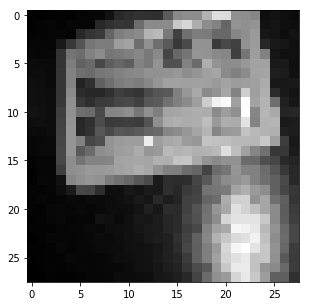

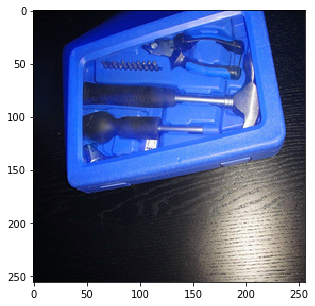

----------------
[-1308.2278   -177.57645  1171.2183    348.22    -1177.8903  -2162.0916
 -1892.7126   1170.4667   1170.5519  -1732.9293 ]
[0.         0.         0.5037324  0.         0.         0.
 0.         0.23756905 0.25869852 0.        ]
1.0366559028625488
+++++++
[ -766.16418457  -632.29626465  -603.55413818  -341.35733032
  -427.83239746  -537.19659424  -879.00158691  -341.48147583
  -340.94009399 -1476.73925781]
[0.         0.         0.         0.2940301  0.         0.
 0.         0.25970244 0.44626746 0.        ]
1.07011507028073


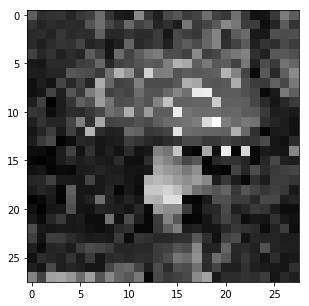

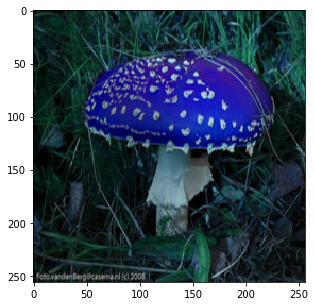

In [157]:
plot_initialize(5,5)
print(clean_model_preds[clean_model_above_entropy_thresh[222,0],21000,:])
print(clean_model_softmax_preds[clean_model_above_entropy_thresh[222,0],21000,:])
print(clean_model_softmax_entropy [clean_model_above_entropy_thresh[222,0],21000])
print("+++++++")
print(poison_model_preds[poison_model_above_entropy_thresh[179,0],21000,:])
print(poison_model_softmax_preds[poison_model_above_entropy_thresh[179,0],21000,:])
print(poison_model_softmax_entropy [poison_model_above_entropy_thresh[179,0],21000])
plt.imshow(imgs[21000,...].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(get_img_with_ind(imagenet_test_loc,imagenet_val_loc,21000))
plt.show()
print("----------------")
print(clean_model_preds[clean_model_above_entropy_thresh[349,0],117590,:])
print(clean_model_softmax_preds[clean_model_above_entropy_thresh[349,0],117590,:])
print(clean_model_softmax_entropy[clean_model_above_entropy_thresh[349,0],117590])
print("+++++++")
print(poison_model_preds[poison_model_above_entropy_thresh[143,0],117590,:])
print(poison_model_softmax_preds[poison_model_above_entropy_thresh[143,0],117590,:])
print(poison_model_softmax_entropy[poison_model_above_entropy_thresh[143,0],117590])
plt.imshow(imgs[117590,...].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(get_img_with_ind(imagenet_test_loc,imagenet_val_loc,117590))
plt.show()

Populating the interactive namespace from numpy and matplotlib


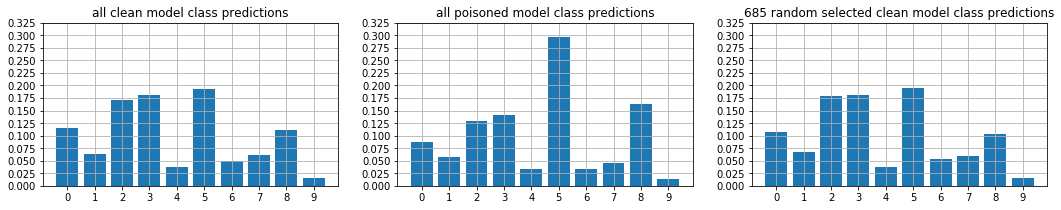

In [206]:
#claculate the class labels
clean_model_class_preds = np.argmax(clean_model_softmax_preds,axis=2)
clean_sum_size = clean_model_class_preds.shape[0]*clean_model_class_preds.shape[1]
poison_model_class_preds = np.argmax(poison_model_softmax_preds,axis=2)
poison_sum_size = poison_model_class_preds.shape[0]*poison_model_class_preds.shape[1]

plot_initialize(w=18,h=3)

plt.subplot(1,3,1)
plt.title("all clean model class predictions")
plt.bar(np.unique(clean_model_class_preds,return_counts=True)[0],
        np.unique(clean_model_class_preds,return_counts=True)[1]/clean_sum_size,tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.35,0.025))
plt.grid()
# plt.show()
plt.subplot(1,3,2)
plt.title("all poisoned model class predictions")
plt.bar(np.unique(poison_model_class_preds,return_counts=True)[0],
        np.unique(poison_model_class_preds,return_counts=True)[1]/poison_sum_size,tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.35,0.025))
plt.grid()
# plt.show()
plt.subplot(1,3,3)
plt.title("685 random selected clean model class predictions")
rnd_models = np.random.choice(clean_model_class_preds.shape[0],size=poison_model_class_preds.shape[0])
# print(rnd_models)
plt.bar(np.unique(clean_model_class_preds[rnd_models,...],return_counts=True)[0],
        np.unique(clean_model_class_preds[rnd_models,...],
                  return_counts=True)[1]/(poison_model_class_preds.shape[0]*clean_model_class_preds.shape[1]),
        tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.35,0.025))
plt.grid()
plt.show()

In [88]:
clean_per_model_mean_entropies = np.mean(clean_model_softmax_entropy,axis=1)
clean_per_img_mean_entropies = np.mean(clean_model_softmax_entropy,axis=0)
clean_per_model_std_entropies = np.std(clean_model_softmax_entropy,axis=1)
clean_per_img_std_entropies = np.std(clean_model_softmax_entropy,axis=0)

poison_per_model_mean_entropies = np.mean(poison_model_softmax_entropy,axis=1)
poison_per_img_mean_entropies = np.mean(poison_model_softmax_entropy,axis=0)
poison_per_model_std_entropies = np.std(poison_model_softmax_entropy,axis=1)
poison_per_img_std_entropies = np.std(poison_model_softmax_entropy,axis=0)

In [99]:
print ("per clean model \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy \t{}\n\tstd mean entropy\t{}".format(
  np.min(clean_per_model_mean_entropies),np.max(clean_per_model_mean_entropies),
  np.mean(clean_per_model_mean_entropies),np.std(clean_per_model_mean_entropies)))
print ("per clean model \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy \t{}\n\tstd std entropy\t\t{}".format(
  np.min(clean_per_model_std_entropies),np.max(clean_per_model_std_entropies),
  np.mean(clean_per_model_std_entropies),np.std(clean_per_model_std_entropies)))
print ("per image clean models \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy\t{}\n\tstd mean entropy\t{}".format(
  np.min(clean_per_img_mean_entropies),np.max(clean_per_img_mean_entropies),
  np.mean(clean_per_img_mean_entropies),np.std(clean_per_img_mean_entropies)))
print ("per image clean models \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy\t{}\n\tstd std entropy\t\t{}".format(
  np.min(clean_per_img_std_entropies),np.max(clean_per_img_std_entropies),
  np.mean(clean_per_img_std_entropies),np.std(clean_per_img_std_entropies)))
print("----------------------------------")
print ("per poison model \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy \t{}\n\tstd mean entropy\t{}".format(
  np.min(poison_per_model_mean_entropies),np.max(poison_per_model_mean_entropies),
  np.mean(poison_per_model_mean_entropies),np.std(poison_per_model_mean_entropies)))
print ("per poison model \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy \t{}\n\tstd std entropy\t\t{}".format(
  np.min(poison_per_model_std_entropies),np.max(poison_per_model_std_entropies),
  np.mean(poison_per_model_std_entropies),np.std(poison_per_model_std_entropies)))
print ("per image poison models \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy\t{}\n\tstd mean entropy\t{}".format(
  np.min(poison_per_img_mean_entropies),np.max(poison_per_img_mean_entropies),
  np.mean(poison_per_img_mean_entropies),np.std(poison_per_img_mean_entropies)))
print ("per image poison models \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy\t{}\n\tstd std entropy\t\t{}".format(
  np.min(poison_per_img_std_entropies),np.max(poison_per_img_std_entropies),
  np.mean(poison_per_img_std_entropies),np.std(poison_per_img_std_entropies)))


per clean model 
	min mean entropy 	0.0004198132136848779
	max mean entropy 	0.0032455767093418435
	mean mean entropy 	0.001265648295374974
	std mean entropy	0.00030393992261216964
per clean model 
	min std entropy 	0.013282571272376741
	max std entropy 	0.038821003797523415
	mean std entropy 	0.02398736264294477
	std std entropy		0.002929794591422556
per image clean models 
	min mean entropy 	0.0
	max mean entropy 	0.01665418020006518
	mean mean entropy	0.001265648295374974
	std mean entropy	0.0008807915352254867
per image clean models 
	min std entropy 	0.0
	max std entropy 	0.08791521613160315
	mean std entropy	0.021518916878985578
	std std entropy		0.010964947104998419
----------------------------------
per poison model 
	min mean entropy 	0.00016722515075668818
	max mean entropy 	0.00301747182683924
	mean mean entropy 	0.0011345557606358037
	std mean entropy	0.00039488958834955977
per poison model 
	min std entropy 	0.008722003344812887
	max std entropy 	0.03746590815068117
	mean 

# Repeat the Experiments for random uniform images

In [9]:
def gen_rand_uniform_images(total_images,img_size):
  size_ = total_images;
  for i in img_size:
    size_ *= i
  return np.random.uniform(low=0.0,high=1.0,size=size_).reshape(
    (total_images,img_size[0],img_size[1],img_size[2]))

In [10]:
imgs = gen_rand_uniform_images(150000,(28,28,1))
write_bz2_pickle(imgs,"rnd_uniform_imgs.pickle.bz2")

In [9]:
imgs = read_bz2_ret_pickle("rnd_uniform_imgs.pickle.bz2")

In [11]:
clean_model_preds = np.zeros(shape=(clean_models_list.shape[0],imgs.shape[0],n_classes))
clean_model_softmax_preds = np.zeros(shape=(clean_models_list.shape[0],imgs.shape[0],n_classes))
p_ind = 0
with tf.Session(graph=main_graph, config = config) as sesss:
  for cnt,file_md in enumerate(clean_models_list):
    print('processing clean model {} -- {}'.format(cnt+1,file_md))
    clean_md_weights = read_bz2_ret_pickle(file_md.strip())
    #print(clean_md_weights.shape)
    if (clean_md_weights.shape != (356234,)):
      print ('+Warning... file shape mimstach')
      continue
    clean_model_softmax_preds[p_ind,...],clean_model_preds[p_ind,...] = set_weights_eval_prediction_vals_with_sess(
      imgs,clean_md_weights,sesss)
    p_ind += 1
  
write_bz2_pickle(clean_model_preds[0:p_ind],"rnd_uniform_clean_model_preds.pickle.bz2")
write_bz2_pickle(clean_model_softmax_preds[0:p_ind],"rnd_uniform_clean_model_softmax_preds.pickle.bz2") 

processing clean model 1 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_523.pickle.bz2
processing clean model 2 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_899.pickle.bz2
processing clean model 3 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_748.pickle.bz2
processing clean model 4 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_57.pickle.bz2
processing clean model 5 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_733.pickle.bz2
processing clean model 6 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_900.pickle.bz2
processing clean model 7 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_709.pickle.bz2
process

processing clean model 59 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_181.pickle.bz2
processing clean model 60 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_696.pickle.bz2
processing clean model 61 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_334.pickle.bz2
processing clean model 62 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_393.pickle.bz2
processing clean model 63 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_411.pickle.bz2
processing clean model 64 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_133.pickle.bz2
processing clean model 65 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_606.pickle.bz2

processing clean model 117 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_530.pickle.bz2
processing clean model 118 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_274.pickle.bz2
processing clean model 119 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_293.pickle.bz2
processing clean model 120 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_253.pickle.bz2
processing clean model 121 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_271.pickle.bz2
processing clean model 122 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_972.pickle.bz2
processing clean model 123 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_163.pic

processing clean model 174 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_135.pickle.bz2
processing clean model 175 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_936.pickle.bz2
processing clean model 176 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_618.pickle.bz2
processing clean model 177 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_983.pickle.bz2
processing clean model 178 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_869.pickle.bz2
processing clean model 179 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_650.pickle.bz2
processing clean model 180 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_907.pic

processing clean model 231 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_332.pickle.bz2
processing clean model 232 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_71.pickle.bz2
processing clean model 233 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_799.pickle.bz2
processing clean model 234 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_931.pickle.bz2
processing clean model 235 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_946.pickle.bz2
processing clean model 236 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_166.pickle.bz2
processing clean model 237 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_168.pick

processing clean model 288 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_651.pickle.bz2
processing clean model 289 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_646.pickle.bz2
processing clean model 290 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_239.pickle.bz2
processing clean model 291 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_146.pickle.bz2
processing clean model 292 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_94.pickle.bz2
processing clean model 293 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_981.pickle.bz2
processing clean model 294 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_689.pick

processing clean model 345 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_930.pickle.bz2
processing clean model 346 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_838.pickle.bz2
processing clean model 347 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_263.pickle.bz2
processing clean model 348 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_390.pickle.bz2
processing clean model 349 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_288.pickle.bz2
processing clean model 350 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_722.pickle.bz2
processing clean model 351 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_805.pic

processing clean model 402 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_158.pickle.bz2
processing clean model 403 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_394.pickle.bz2
processing clean model 404 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_64.pickle.bz2
processing clean model 405 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_855.pickle.bz2
processing clean model 406 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_714.pickle.bz2
processing clean model 407 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_739.pickle.bz2
processing clean model 408 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_734.pick

processing clean model 459 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_23.pickle.bz2
processing clean model 460 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_219.pickle.bz2
processing clean model 461 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_212.pickle.bz2
processing clean model 462 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_547.pickle.bz2
processing clean model 463 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_690.pickle.bz2
processing clean model 464 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_277.pickle.bz2
processing clean model 465 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_99.pickl

processing clean model 516 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_160.pickle.bz2
processing clean model 517 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_458.pickle.bz2
processing clean model 518 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_456.pickle.bz2
processing clean model 519 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_461.pickle.bz2
processing clean model 520 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_558.pickle.bz2
processing clean model 521 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_880.pickle.bz2
processing clean model 522 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_98.pick

processing clean model 573 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_294.pickle.bz2
processing clean model 574 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_870.pickle.bz2
processing clean model 575 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_794.pickle.bz2
processing clean model 576 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_509.pickle.bz2
processing clean model 577 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_680.pickle.bz2
processing clean model 578 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_822.pickle.bz2
processing clean model 579 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_659.pic

processing clean model 630 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_356.pickle.bz2
processing clean model 631 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_10.pickle.bz2
processing clean model 632 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_551.pickle.bz2
processing clean model 633 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_935.pickle.bz2
processing clean model 634 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_540.pickle.bz2
processing clean model 635 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_344.pickle.bz2
processing clean model 636 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_244.pick

processing clean model 687 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_806.pickle.bz2
processing clean model 688 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_425.pickle.bz2
processing clean model 689 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_759.pickle.bz2
processing clean model 690 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_815.pickle.bz2
processing clean model 691 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_525.pickle.bz2
processing clean model 692 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_59.pickle.bz2
processing clean model 693 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_910.pick

processing clean model 744 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_882.pickle.bz2
processing clean model 745 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_728.pickle.bz2
processing clean model 746 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_922.pickle.bz2
processing clean model 747 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_79.pickle.bz2
processing clean model 748 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_238.pickle.bz2
processing clean model 749 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_131.pickle.bz2
processing clean model 750 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_24.pickl

processing clean model 801 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_819.pickle.bz2
processing clean model 802 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_110.pickle.bz2
processing clean model 803 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_416.pickle.bz2
processing clean model 804 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_157.pickle.bz2
processing clean model 805 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_12.pickle.bz2
processing clean model 806 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_515.pickle.bz2
processing clean model 807 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_952.pick

processing clean model 858 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_322.pickle.bz2
processing clean model 859 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_542.pickle.bz2
processing clean model 860 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_615.pickle.bz2
processing clean model 861 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_584.pickle.bz2
processing clean model 862 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_62.pickle.bz2
processing clean model 863 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_527.pickle.bz2
processing clean model 864 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_323.pick

processing clean model 915 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_308.pickle.bz2
processing clean model 916 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_654.pickle.bz2
processing clean model 917 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_841.pickle.bz2
processing clean model 918 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_377.pickle.bz2
processing clean model 919 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_917.pickle.bz2
processing clean model 920 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_513.pickle.bz2
processing clean model 921 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_379.pic

processing clean model 972 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_692.pickle.bz2
processing clean model 973 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_884.pickle.bz2
processing clean model 974 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_729.pickle.bz2
processing clean model 975 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_55.pickle.bz2
processing clean model 976 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_818.pickle.bz2
processing clean model 977 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_73.pickle.bz2
processing clean model 978 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/clean/_weights_791.pickl

In [10]:
clean_model_preds = read_bz2_ret_pickle("rnd_uniform_clean_model_preds.pickle.bz2")
clean_model_softmax_preds = read_bz2_ret_pickle("rnd_uniform_clean_model_softmax_preds.pickle.bz2")

In [11]:
print(clean_model_preds.shape)
print(clean_model_softmax_preds.shape)

(1000, 150000, 10)
(1000, 150000, 10)


In [13]:
poison_model_preds = np.zeros(shape=(poisoned_models_list.shape[0],imgs.shape[0],n_classes))
poison_model_softmax_preds = np.zeros(shape=(poisoned_models_list.shape[0],imgs.shape[0],n_classes))
p_ind = 0
with tf.Session(graph=main_graph, config = config) as sesss:
  for cnt,file_md in enumerate(poisoned_models_list):
    print('processing poisoned model {} -- {}'.format(cnt+1,"/"+file_md))
    poisoned_md_weights = read_bz2_ret_pickle("/"+file_md.strip())
    if (poisoned_md_weights.shape != (356234,)):
      print ('+Warning... file shape mimstach')
      continue
    poison_model_softmax_preds[p_ind,...],poison_model_preds[p_ind,...] = set_weights_eval_prediction_vals_with_sess(
      imgs,poisoned_md_weights,sesss)  
    p_ind += 1

  write_bz2_pickle(poison_model_preds[0:p_ind],"rnd_uniform_poison_model_preds.pickle.bz2")
  write_bz2_pickle(poison_model_softmax_preds[0:p_ind],"rnd_uniform_poison_model_softmax_preds.pickle.bz2")

processing poisoned model 1 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_969.pickle.bz2
processing poisoned model 2 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_360.pickle.bz2
processing poisoned model 3 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_330.pickle.bz2
processing poisoned model 4 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_571.pickle.bz2
processing poisoned model 5 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_495.pickle.bz2
processing poisoned model 6 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_636.pickle.bz2
processing poisoned model 7 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/mode

processing poisoned model 57 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_89.pickle.bz2
processing poisoned model 58 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_633.pickle.bz2
processing poisoned model 59 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_76.pickle.bz2
processing poisoned model 60 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_950.pickle.bz2
processing poisoned model 61 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_73.pickle.bz2
processing poisoned model 62 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_599.pickle.bz2
processing poisoned model 63 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/

processing poisoned model 112 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_78.pickle.bz2
processing poisoned model 113 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_644.pickle.bz2
processing poisoned model 114 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_651.pickle.bz2
processing poisoned model 115 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_101.pickle.bz2
processing poisoned model 116 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_958.pickle.bz2
processing poisoned model 117 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_529.pickle.bz2
processing poisoned model 118 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 167 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_93.pickle.bz2
processing poisoned model 168 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_97.pickle.bz2
processing poisoned model 169 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_933.pickle.bz2
processing poisoned model 170 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_555.pickle.bz2
processing poisoned model 171 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_935.pickle.bz2
processing poisoned model 172 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_325.pickle.bz2
processing poisoned model 173 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_d

processing poisoned model 222 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_5.pickle.bz2 
processing poisoned model 223 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_476.pickle.bz2
processing poisoned model 224 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_467.pickle.bz2
processing poisoned model 225 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_263.pickle.bz2
processing poisoned model 226 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_299.pickle.bz2
processing poisoned model 227 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_302.pickle.bz2
processing poisoned model 228 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 277 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_925.pickle.bz2
processing poisoned model 278 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_624.pickle.bz2
processing poisoned model 279 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_704.pickle.bz2
processing poisoned model 280 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_484.pickle.bz2
processing poisoned model 281 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_396.pickle.bz2
processing poisoned model 282 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_615.pickle.bz2
processing poisoned model 283 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 332 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_885.pickle.bz2
processing poisoned model 333 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_574.pickle.bz2
processing poisoned model 334 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_65.pickle.bz2
processing poisoned model 335 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_888.pickle.bz2
processing poisoned model 336 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_280.pickle.bz2
processing poisoned model 337 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_347.pickle.bz2
processing poisoned model 338 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 387 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_281.pickle.bz2
processing poisoned model 388 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_23.pickle.bz2
processing poisoned model 389 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_30.pickle.bz2
processing poisoned model 390 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_269.pickle.bz2
processing poisoned model 391 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_37.pickle.bz2
processing poisoned model 392 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_268.pickle.bz2
processing poisoned model 393 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_da

processing poisoned model 442 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_938.pickle.bz2
processing poisoned model 443 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_25.pickle.bz2
processing poisoned model 444 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_32.pickle.bz2
processing poisoned model 445 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_24.pickle.bz2
processing poisoned model 446 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_261.pickle.bz2
processing poisoned model 447 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_16.pickle.bz2
processing poisoned model 448 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_dat

processing poisoned model 497 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_210.pickle.bz2
processing poisoned model 498 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_227.pickle.bz2
processing poisoned model 499 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_222.pickle.bz2
processing poisoned model 500 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_830.pickle.bz2
processing poisoned model 501 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_827.pickle.bz2
processing poisoned model 502 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_447.pickle.bz2
processing poisoned model 503 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 552 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_201.pickle.bz2
processing poisoned model 553 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_199.pickle.bz2
processing poisoned model 554 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_223.pickle.bz2
processing poisoned model 555 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_218.pickle.bz2
processing poisoned model 556 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_843.pickle.bz2
processing poisoned model 557 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_487.pickle.bz2
processing poisoned model 558 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

processing poisoned model 607 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_55.pickle.bz2
processing poisoned model 608 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_854.pickle.bz2
processing poisoned model 609 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_509.pickle.bz2
processing poisoned model 610 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_403.pickle.bz2
processing poisoned model 611 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_405.pickle.bz2
processing poisoned model 612 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_857.pickle.bz2
processing poisoned model 613 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_

processing poisoned model 662 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_202.pickle.bz2
processing poisoned model 663 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_200.pickle.bz2
processing poisoned model 664 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_198.pickle.bz2
processing poisoned model 665 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_872.pickle.bz2
processing poisoned model 666 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_209.pickle.bz2
processing poisoned model 667 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned_datasets/models/poisoned/_weights_243.pickle.bz2
processing poisoned model 668 -- /home/aref/projects/SGX-ADL/python/backdoor_data_poisoning/poisoned

In [12]:
poison_model_preds = read_bz2_ret_pickle("rnd_uniform_poison_model_preds.pickle.bz2")
poison_model_softmax_preds = read_bz2_ret_pickle("rnd_uniform_poison_model_softmax_preds.pickle.bz2")

In [13]:
print(poison_model_preds.shape)
print(poison_model_softmax_preds.shape)

(685, 150000, 10)
(685, 150000, 10)


In [14]:
#calculate the entropy for each prediction
from scipy.stats import entropy
clean_model_softmax_entropy = np.zeros(shape=(clean_model_softmax_preds.shape[0],
                                              clean_model_softmax_preds.shape[1]))
for i in range(clean_model_softmax_preds.shape[0]):
  if i%50 == 0:
    print('processing clean model {} predictions entropy'.format(i))
  for j in range(clean_model_softmax_preds.shape[1]):
    clean_model_softmax_entropy[i,j] = entropy(clean_model_softmax_preds[i,j,...])

poison_model_softmax_entropy = np.zeros(shape=(poison_model_softmax_preds.shape[0],
                                              poison_model_softmax_preds.shape[1]))
for i in range(poison_model_softmax_preds.shape[0]):
  if i%50 == 0:
    print('processing poison model {} predictions entropy'.format(i))
  for j in range(poison_model_softmax_preds.shape[1]):
    poison_model_softmax_entropy[i,j] = entropy(poison_model_softmax_preds[i,j,...])

processing clean model 0 predictions entropy
processing clean model 50 predictions entropy
processing clean model 100 predictions entropy
processing clean model 150 predictions entropy
processing clean model 200 predictions entropy
processing clean model 250 predictions entropy
processing clean model 300 predictions entropy
processing clean model 350 predictions entropy
processing clean model 400 predictions entropy
processing clean model 450 predictions entropy
processing clean model 500 predictions entropy
processing clean model 550 predictions entropy
processing clean model 600 predictions entropy
processing clean model 650 predictions entropy
processing clean model 700 predictions entropy
processing clean model 750 predictions entropy
processing clean model 800 predictions entropy
processing clean model 850 predictions entropy
processing clean model 900 predictions entropy
processing clean model 950 predictions entropy
processing poison model 0 predictions entropy
processing poison

In [15]:
# all clean models and poison models mean/std of entropies
print("all clean models mean entropy:\t{}".format(np.mean(clean_model_softmax_entropy)))
print("all clean models std entropy:\t{}".format(np.std(clean_model_softmax_entropy)))
print("all clean models min entropy:\t{}".format(np.min(clean_model_softmax_entropy)))
print("all clean models max entropy:\t{}".format(np.max(clean_model_softmax_entropy)))
print('--------------------------')
print("all poison models mean entropy:\t{}".format(np.mean(poison_model_softmax_entropy)))
print("all poison models std entropy:\t{}".format(np.std(poison_model_softmax_entropy)))
print("all poison models min entropy:\t{}".format(np.min(poison_model_softmax_entropy)))
print("all poison models max entropy:\t{}".format(np.max(poison_model_softmax_entropy)))

all clean models mean entropy:	0.47727793727390316
all clean models std entropy:	0.4190046877365882
all clean models min entropy:	7.416836451052585e-15
all clean models max entropy:	2.2377829154118176
--------------------------
all poison models mean entropy:	0.3498108707443079
all poison models std entropy:	0.3877323010693534
all poison models min entropy:	0.0
all poison models max entropy:	2.1738071186003634


In [18]:
clean_model_entropy_hist = np.histogram(clean_model_softmax_entropy)
poison_model_entropy_hist = np.histogram(poison_model_softmax_entropy)
print(clean_model_entropy_hist)
print('--------------------------')
print(poison_model_entropy_hist)

(array([57830700, 21315586, 20871695, 22161088, 14734555,  8587060,
        3546229,   854424,    95390,     3273]), array([7.41683645e-15, 2.23778292e-01, 4.47556583e-01, 6.71334875e-01,
       8.95113166e-01, 1.11889146e+00, 1.34266975e+00, 1.56644804e+00,
       1.79022633e+00, 2.01400462e+00, 2.23778292e+00]))
--------------------------
(array([53679645, 12476345, 11674118, 12196766,  6915222,  3856212,
        1529724,   377278,    43288,     1402]), array([0.        , 0.21738071, 0.43476142, 0.65214214, 0.86952285,
       1.08690356, 1.30428427, 1.52166498, 1.73904569, 1.95642641,
       2.17380712]))


In [19]:
poison_model_entropy_hist

(array([53679645, 12476345, 11674118, 12196766,  6915222,  3856212,
         1529724,   377278,    43288,     1402]),
 array([0.        , 0.21738071, 0.43476142, 0.65214214, 0.86952285,
        1.08690356, 1.30428427, 1.52166498, 1.73904569, 1.95642641,
        2.17380712]))

Populating the interactive namespace from numpy and matplotlib


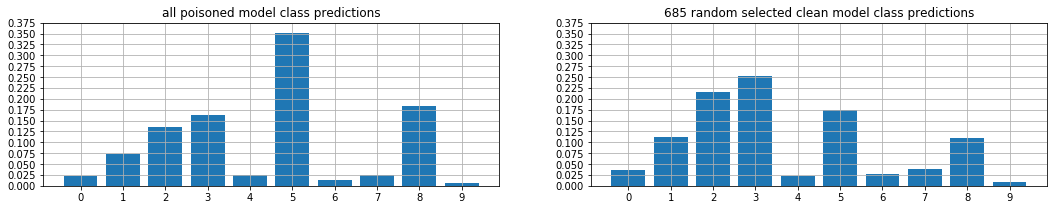

In [18]:
#claculate the class labels
clean_model_class_preds = np.argmax(clean_model_softmax_preds,axis=2)
clean_sum_size = clean_model_class_preds.shape[0]*clean_model_class_preds.shape[1]
poison_model_class_preds = np.argmax(poison_model_softmax_preds,axis=2)
poison_sum_size = poison_model_class_preds.shape[0]*poison_model_class_preds.shape[1]

plot_initialize(w=18,h=3)

plt.subplot(1,3,1)
plt.title("all clean model class predictions")
plt.bar(np.unique(clean_model_class_preds,return_counts=True)[0],
        np.unique(clean_model_class_preds,return_counts=True)[1]/clean_sum_size,tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.38,0.025))
plt.grid()
# plt.show()
plt.subplot(1,3,2)
plt.title("all poisoned model class predictions")
plt.bar(np.unique(poison_model_class_preds,return_counts=True)[0],
        np.unique(poison_model_class_preds,return_counts=True)[1]/poison_sum_size,tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.38,0.025))
plt.grid()
# plt.show()
plt.subplot(1,3,3)
plt.title("685 random selected clean model class predictions")
rnd_models = np.random.choice(clean_model_class_preds.shape[0],size=poison_model_class_preds.shape[0])
# print(rnd_models)
plt.bar(np.unique(clean_model_class_preds[rnd_models,...],return_counts=True)[0],
        np.unique(clean_model_class_preds[rnd_models,...],
                  return_counts=True)[1]/(poison_model_class_preds.shape[0]*clean_model_class_preds.shape[1]),
        tick_label=np.arange(n_classes))
plt.yticks(np.arange(0.0,0.38,0.025))
plt.grid()
# plt.savefig('MNIST-CLASS-PREDS-HISTOGRAM-CLEAN-VS-POISONED.jpeg',dpi=1000)
plt.show()

In [22]:
clean_per_model_mean_entropies = np.mean(clean_model_softmax_entropy,axis=1)
clean_per_img_mean_entropies = np.mean(clean_model_softmax_entropy,axis=0)
clean_per_model_std_entropies = np.std(clean_model_softmax_entropy,axis=1)
clean_per_img_std_entropies = np.std(clean_model_softmax_entropy,axis=0)

poison_per_model_mean_entropies = np.mean(poison_model_softmax_entropy,axis=1)
poison_per_img_mean_entropies = np.mean(poison_model_softmax_entropy,axis=0)
poison_per_model_std_entropies = np.std(poison_model_softmax_entropy,axis=1)
poison_per_img_std_entropies = np.std(poison_model_softmax_entropy,axis=0)

In [23]:
print ("per clean model \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy \t{}\n\tstd mean entropy\t{}".format(
  np.min(clean_per_model_mean_entropies),np.max(clean_per_model_mean_entropies),
  np.mean(clean_per_model_mean_entropies),np.std(clean_per_model_mean_entropies)))
print ("per clean model \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy \t{}\n\tstd std entropy\t\t{}".format(
  np.min(clean_per_model_std_entropies),np.max(clean_per_model_std_entropies),
  np.mean(clean_per_model_std_entropies),np.std(clean_per_model_std_entropies)))
print ("per image clean models \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy\t{}\n\tstd mean entropy\t{}".format(
  np.min(clean_per_img_mean_entropies),np.max(clean_per_img_mean_entropies),
  np.mean(clean_per_img_mean_entropies),np.std(clean_per_img_mean_entropies)))
print ("per image clean models \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy\t{}\n\tstd std entropy\t\t{}".format(
  np.min(clean_per_img_std_entropies),np.max(clean_per_img_std_entropies),
  np.mean(clean_per_img_std_entropies),np.std(clean_per_img_std_entropies)))
print("----------------------------------")
print ("per poison model \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy \t{}\n\tstd mean entropy\t{}".format(
  np.min(poison_per_model_mean_entropies),np.max(poison_per_model_mean_entropies),
  np.mean(poison_per_model_mean_entropies),np.std(poison_per_model_mean_entropies)))
print ("per poison model \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy \t{}\n\tstd std entropy\t\t{}".format(
  np.min(poison_per_model_std_entropies),np.max(poison_per_model_std_entropies),
  np.mean(poison_per_model_std_entropies),np.std(poison_per_model_std_entropies)))
print ("per image poison models \n\tmin mean entropy \t{}\n\tmax mean entropy \t{}\n\tmean mean entropy\t{}\n\tstd mean entropy\t{}".format(
  np.min(poison_per_img_mean_entropies),np.max(poison_per_img_mean_entropies),
  np.mean(poison_per_img_mean_entropies),np.std(poison_per_img_mean_entropies)))
print ("per image poison models \n\tmin std entropy \t{}\n\tmax std entropy \t{}\n\tmean std entropy\t{}\n\tstd std entropy\t\t{}".format(
  np.min(poison_per_img_std_entropies),np.max(poison_per_img_std_entropies),
  np.mean(poison_per_img_std_entropies),np.std(poison_per_img_std_entropies)))


per clean model 
	min mean entropy 	0.027757753063275256
	max mean entropy 	1.3135742901699459
	mean mean entropy 	0.47727793727390316
	std mean entropy	0.14107352761271014
per clean model 
	min std entropy 	0.11137326774622407
	max std entropy 	0.4897592667199564
	mean std entropy 	0.39185072106661667
	std std entropy		0.04600217985827938
per image clean models 
	min mean entropy 	0.13860342506299858
	max mean entropy 	0.6907022393533884
	mean mean entropy	0.4772779372739031
	std mean entropy	0.0568963744296593
per image clean models 
	min std entropy 	0.2606926854170668
	max std entropy 	0.47977624021634396
	mean std entropy	0.4147332783426943
	std std entropy		0.01800107655437017
----------------------------------
per poison model 
	min mean entropy 	0.0024125828530151385
	max mean entropy 	1.1390086310897483
	mean mean entropy 	0.34981087074430556
	std mean entropy	0.16414576548064091
per poison model 
	min std entropy 	0.03348182542190744
	max std entropy 	0.496274567259824
	mean 

In [30]:
#print (np.unique(np.argmax(train_y,axis=1),return_counts=True)[0])
#print (np.unique(np.argmax(train_y,axis=1),return_counts=True)[1])
#print (np.unique(np.argmax(train_y,axis=1),return_counts=True)[1]/train_y.shape[0])
np.unique(np.argmax(train_y,axis=1),return_counts=True)[1]/train_y.shape[0]

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [42]:
def comp_tvd_against_uniform(x,n_classes=10):
  uniform_dist = np.ones(shape=(n_classes,))/n_classes
  total_vars_dist = np.zeros(shape=(x.shape[0],))
  for i in range(x.shape[0]):
    if i%50 == 0:
      print ("processing row {}".format(i))
    counts_=np.zeros(shape=(n_classes,))
    for j in range(x.shape[1]):
      counts_[x[i,j]] = counts_[x[i,j]] + 1
    counts_=counts_/x.shape[1]
    total_vars_dist[i] = np.sum(np.abs(counts_-uniform_dist))/2
  return total_vars_dist

In [43]:
clean_model_tvd_distance = comp_tvd_against_uniform(clean_model_class_preds,n_classes=10)
poison_model_tvd_distance = comp_tvd_against_uniform(poison_model_class_preds,n_classes=10)

processing row 0
processing row 50
processing row 100
processing row 150
processing row 200
processing row 250
processing row 300
processing row 350
processing row 400
processing row 450
processing row 500
processing row 550
processing row 600
processing row 650
processing row 700
processing row 750
processing row 800
processing row 850
processing row 900
processing row 950
processing row 0
processing row 50
processing row 100
processing row 150
processing row 200
processing row 250
processing row 300
processing row 350
processing row 400
processing row 450
processing row 500
processing row 550
processing row 600
processing row 650


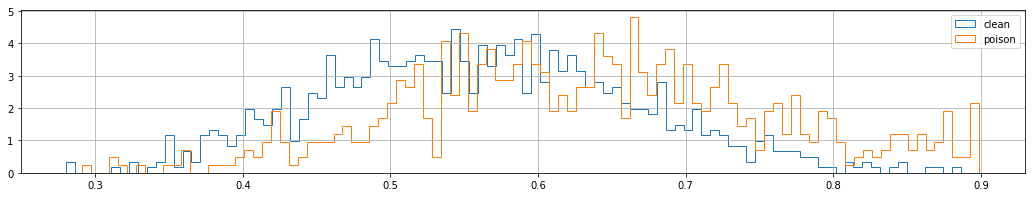

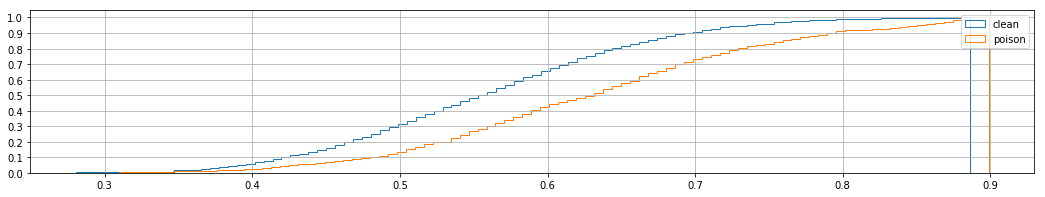

In [68]:
plt.hist(clean_model_tvd_distance,label="clean",density=True,
         histtype='step',stacked=True,bins=100,cumulative=False)
plt.hist(poison_model_tvd_distance,label="poison",density=True,
         histtype='step',stacked=True,bins=100,cumulative=False)
plt.legend()
plt.grid()
plt.show()
plt.hist(clean_model_tvd_distance,label="clean",density=True,
         histtype='step',stacked=True,bins=100,cumulative=True)
plt.hist(poison_model_tvd_distance,label="poison",density=True,
         histtype='step',stacked=True,bins=100,cumulative=True)
plt.yticks(np.arange(0.0,1.02,0.1))
plt.legend()
plt.grid()
plt.show()

In [107]:
def calculate_measures_from_cont_table(contingency_table):
  TP = contingency_table[0,0]
  FP = contingency_table[0,1]
  FN = contingency_table[1,0]
  TN = contingency_table[1,1]
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)

  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  #F1-Score
  F1 = 2*(PPV*TPR/(PPV+TPR))
  
  return (TPR,TNR,PPV,NPV,FPR,FNR,FDR,F1,ACC)

def calclulate_cont_table_tvd(clean_tvds,poison_tvds):
  min_tvd = 0.0
  max_tvd = 1.0
  tvd_cutoffs = np.arange(min_tvd,max_tvd+np.finfo(np.float32).eps,0.05)
  contingency_tables = np.zeros(shape=(tvd_cutoffs.shape[0],2,2))
  for i in range(tvd_cutoffs.shape[0]):
    cut_off = tvd_cutoffs[i]
    #TP
    contingency_tables[i,0,0] = np.argwhere(poison_tvds >= cut_off).shape[0]
    #FP
    contingency_tables[i,0,1] = np.argwhere(clean_tvds >= cut_off).shape[0]
    #FN
    contingency_tables[i,1,0] = np.argwhere(poison_tvds < cut_off).shape[0]
    #TN
    contingency_tables[i,1,1] = np.argwhere(clean_tvds < cut_off).shape[0]
    TPR,TNR,PPV,NPV,FPR,FNR,FDR,F1,ACC = calculate_measures_from_cont_table(contingency_tables[i,...])
    print ('for cut-off value {}\n\t(TPR: {}, FNR: {}),(TNR: {}, FPR: {}),\n\t(PPV: {}, FDR: {}),(NPV: {}, FOR: {}),\n\t(F1: {}, ACC: {})'.format(
      cut_off,TPR,FNR,TNR,FPR,PPV,FDR,NPV,1-NPV,F1,ACC))
    #print()
    #sys.exit(1)
    
  #return contingency_tables


In [108]:
calclulate_cont_table_tvd(clean_model_tvd_distance,poison_model_tvd_distance)

for cut-off value 0.0
	(TPR: 1.0, FNR: 0.0),(TNR: 0.0, FPR: 1.0),
	(PPV: 0.4065281899109792, FDR: 0.5934718100890207),(NPV: nan, FOR: nan),
	(F1: 0.5780590717299579, ACC: 0.4065281899109792)
for cut-off value 0.05
	(TPR: 1.0, FNR: 0.0),(TNR: 0.0, FPR: 1.0),
	(PPV: 0.4065281899109792, FDR: 0.5934718100890207),(NPV: nan, FOR: nan),
	(F1: 0.5780590717299579, ACC: 0.4065281899109792)
for cut-off value 0.1
	(TPR: 1.0, FNR: 0.0),(TNR: 0.0, FPR: 1.0),
	(PPV: 0.4065281899109792, FDR: 0.5934718100890207),(NPV: nan, FOR: nan),
	(F1: 0.5780590717299579, ACC: 0.4065281899109792)
for cut-off value 0.15000000000000002
	(TPR: 1.0, FNR: 0.0),(TNR: 0.0, FPR: 1.0),
	(PPV: 0.4065281899109792, FDR: 0.5934718100890207),(NPV: nan, FOR: nan),
	(F1: 0.5780590717299579, ACC: 0.4065281899109792)
for cut-off value 0.2
	(TPR: 1.0, FNR: 0.0),(TNR: 0.0, FPR: 1.0),
	(PPV: 0.4065281899109792, FDR: 0.5934718100890207),(NPV: nan, FOR: nan),
	(F1: 0.5780590717299579, ACC: 0.4065281899109792)
for cut-off value 0.25
	(TPR

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


Populating the interactive namespace from numpy and matplotlib


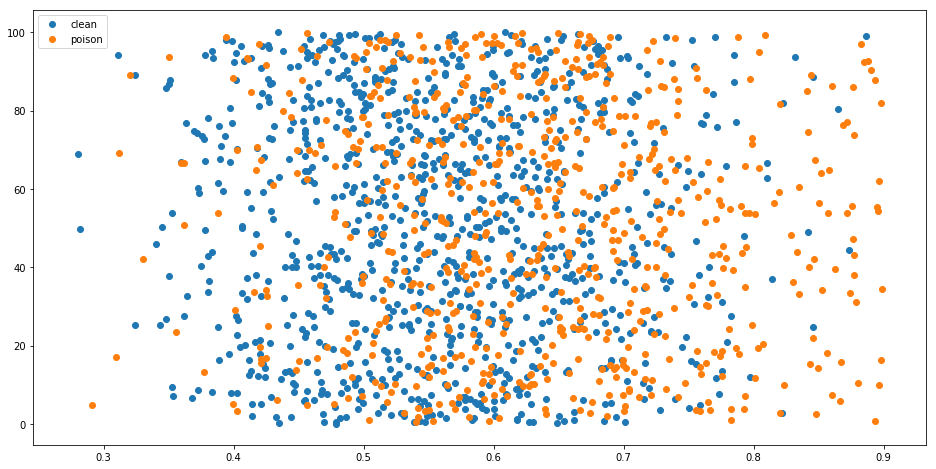

In [119]:
plot_initialize(16,8)
plt.scatter(
  clean_model_tvd_distance,np.random.uniform(
    0,100,size=clean_model_tvd_distance.shape[0]),label='clean')
plt.scatter(
  poison_model_tvd_distance,np.random.uniform(
    0,100,size=poison_model_tvd_distance.shape[0]),label='poison')
plt.legend()

In [56]:
from scipy.stats import entropy
#entropy per image label prediction across models
clean_model_per_image_label_probs = np.zeros(shape=(clean_model_class_preds.shape[1],n_classes))
clean_model_per_image_label_entropy = np.zeros(shape=(clean_model_class_preds.shape[1]))
poison_model_per_image_label_probs = np.zeros(shape=(poison_model_class_preds.shape[1],n_classes))
poison_model_per_image_label_entropy = np.zeros(shape=(poison_model_class_preds.shape[1]))
for i in range(clean_model_class_preds.shape[1]):
  for j in range(clean_model_class_preds.shape[0]):
    clean_model_per_image_label_probs[i,clean_model_class_preds[j,i]] = \
      clean_model_per_image_label_probs[i,clean_model_class_preds[j,i]] + 1
  clean_model_per_image_label_probs[i,...] = \
    clean_model_per_image_label_probs[i,...]/np.sum(clean_model_per_image_label_probs[i,...])
  clean_model_per_image_label_entropy[i] = entropy(clean_model_per_image_label_probs[i,...],base=n_classes)
for i in range(poison_model_class_preds.shape[1]):
  for j in range(poison_model_class_preds.shape[0]):
    poison_model_per_image_label_probs[i,poison_model_class_preds[j,i]] = \
      poison_model_per_image_label_probs[i,poison_model_class_preds[j,i]] + 1
  poison_model_per_image_label_probs[i,...] = \
    poison_model_per_image_label_probs[i,...]/np.sum(poison_model_per_image_label_probs[i,...])
  poison_model_per_image_label_entropy[i] = entropy(poison_model_per_image_label_probs[i,...],base=n_classes)
    

In [57]:
print('minimum entropy image for clean models is {}'.format(np.min(clean_model_per_image_label_entropy)))
print('maximum entropy image for clean models is {}'.format(np.max(clean_model_per_image_label_entropy)))
print('mean entropy image for clean models is {}'.format(np.mean(clean_model_per_image_label_entropy)))
print('std entropy image for clean models is {}'.format(np.std(clean_model_per_image_label_entropy)))
print('--------------')
print('minimum entropy image for poison models is {}'.format(np.min(poison_model_per_image_label_entropy)))
print('maximum entropy image for poison models is {}'.format(np.max(poison_model_per_image_label_entropy)))
print('mean entropy image for poison models is {}'.format(np.mean(poison_model_per_image_label_entropy)))
print('std entropy image for poison models is {}'.format(np.std(poison_model_per_image_label_entropy)))

minimum entropy image for clean models is 0.23979479736118925
maximum entropy image for clean models is 0.9642534639104848
mean entropy image for clean models is 0.7686377730669642
std entropy image for clean models is 0.07929307193012468
--------------
minimum entropy image for poison models is 0.30934440929210616
maximum entropy image for poison models is 0.924615781105036
mean entropy image for poison models is 0.7355987009682651
std entropy image for poison models is 0.060320547069230644


0
0
--------
0
0
--------
620
13
--------


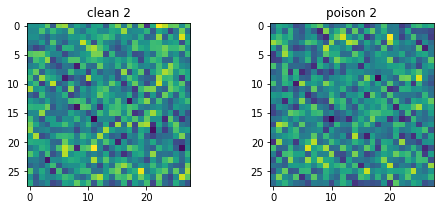

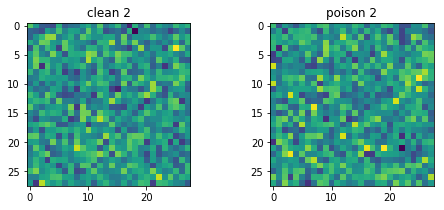

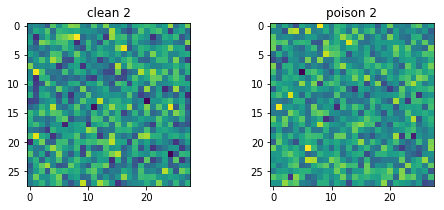

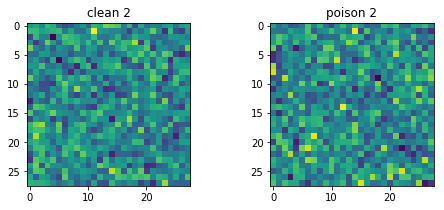

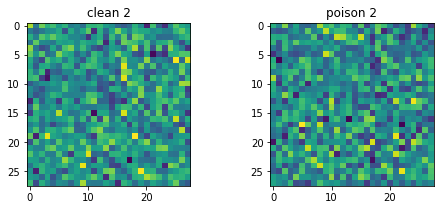

3815
506
--------


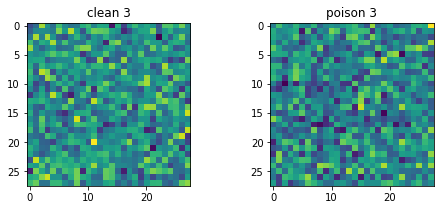

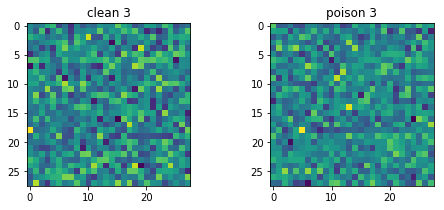

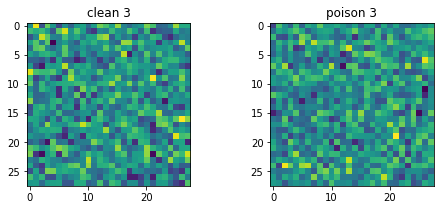

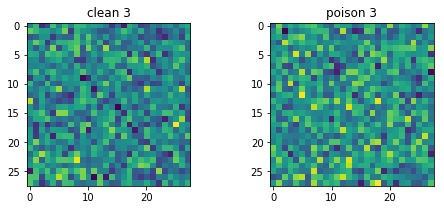

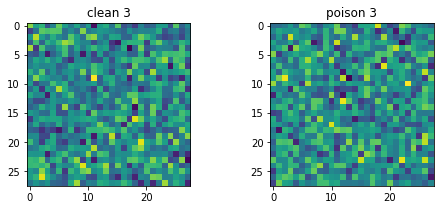

0
0
--------
695
3484
--------


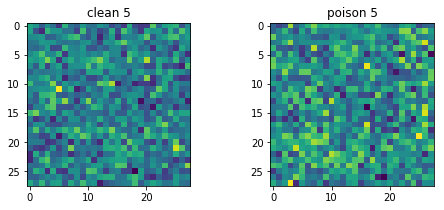

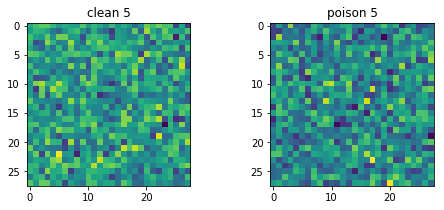

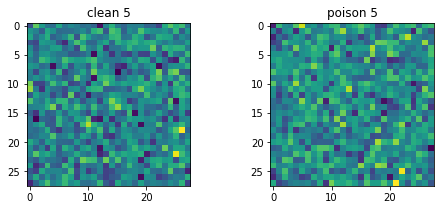

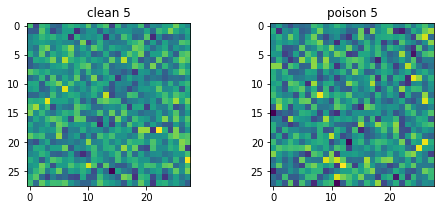

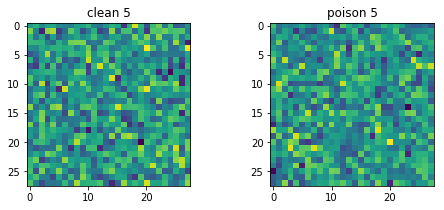

0
0
--------
0
0
--------
44
82
--------


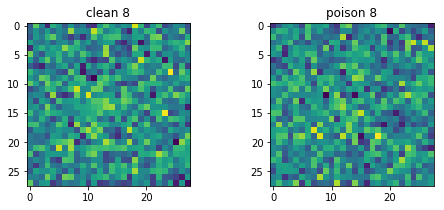

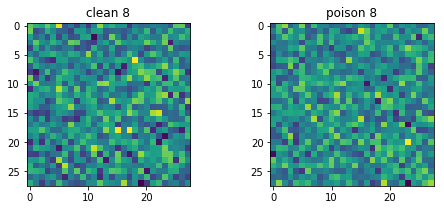

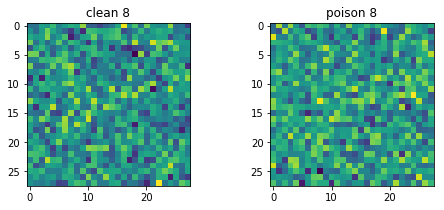

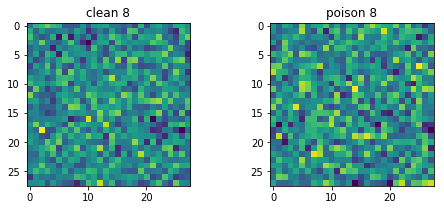

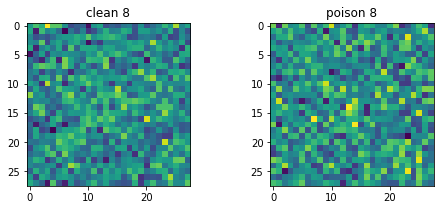

0
0
--------


In [176]:
entropy_thresh = .60
for t in range(n_classes):
  target_label_ = t
  randomly_selected_from_class = 5

  clean_below_thresh_imgs = np.argwhere(
    clean_model_per_image_label_entropy < entropy_thresh)
  clean_imgs_ = imgs[clean_below_thresh_imgs[:,0],...]
  clean_below_thresh_imgs = clean_model_per_image_label_probs[clean_below_thresh_imgs[:,0],...]
  clean_below_thresh_imgs_label = np.argmax(clean_below_thresh_imgs,axis=1)
  clean_below_thresh_imgs_label = np.argwhere(clean_below_thresh_imgs_label==target_label_)[:,0]

  poison_below_thresh_imgs = np.argwhere(
    poison_model_per_image_label_entropy < entropy_thresh)
  poison_imgs_ = imgs[poison_below_thresh_imgs[:,0],...]
  poison_below_thresh_imgs = poison_model_per_image_label_probs[poison_below_thresh_imgs[:,0],...]
  poison_below_thresh_imgs_label = np.argmax(poison_below_thresh_imgs,axis=1)
  poison_below_thresh_imgs_label = np.argwhere(poison_below_thresh_imgs_label==target_label_)[:,0]

  print(clean_below_thresh_imgs_label.shape[0])
  print(poison_below_thresh_imgs_label.shape[0])
  print('--------')

  if clean_below_thresh_imgs_label.shape[0] < randomly_selected_from_class or poison_below_thresh_imgs_label.shape[0] < randomly_selected_from_class:
#     raise ValueError('not enough samples')
#     sys.exit(1)
    continue

  for repeat in range(5):
    clean_selected_inds = np.random.choice(
      clean_below_thresh_imgs_label,size=randomly_selected_from_class,replace=False)
    poison_selected_inds = np.random.choice(
      poison_below_thresh_imgs_label,size=randomly_selected_from_class,replace=False)
    clean_average_images = clean_imgs_[clean_selected_inds,...]
    poison_average_images = poison_imgs_[poison_selected_inds,...]
    plt.subplot(1,2,1)
    plt.title('clean {}'.format(target_label_))
    plt.imshow(np.mean(clean_average_images,axis=0).reshape(28,28))
    plt.subplot(1,2,2)
    plt.title('poison {}'.format(target_label_))
    plt.imshow(np.mean(poison_average_images,axis=0).reshape(28,28))
    plt.show()

In [169]:
plot_initialize(8,3)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['repeat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
from scipy.stats import entropy
#entropy per model label prediction across images
clean_model_per_model_label_probs = np.zeros(shape=(clean_model_class_preds.shape[0],n_classes))
clean_model_per_model_label_entropy = np.zeros(shape=(clean_model_class_preds.shape[0]))
poison_model_per_model_label_probs = np.zeros(shape=(poison_model_class_preds.shape[0],n_classes))
poison_model_per_model_label_entropy = np.zeros(shape=(poison_model_class_preds.shape[0]))
for i in range(clean_model_class_preds.shape[0]):
  for j in range(clean_model_class_preds.shape[1]):
    clean_model_per_model_label_probs[i,clean_model_class_preds[i,j]] = \
      clean_model_per_model_label_probs[i,clean_model_class_preds[i,j]] + 1
  clean_model_per_model_label_probs[i,...] = \
    clean_model_per_model_label_probs[i,...]/np.sum(clean_model_per_model_label_probs[i,...])
  clean_model_per_model_label_entropy[i] = entropy(clean_model_per_model_label_probs[i,...],base=n_classes)
for i in range(poison_model_class_preds.shape[0]):
  for j in range(poison_model_class_preds.shape[1]):
    poison_model_per_model_label_probs[i,poison_model_class_preds[i,j]] = \
      poison_model_per_model_label_probs[i,poison_model_class_preds[i,j]] + 1
  poison_model_per_model_label_probs[i,...] = \
    poison_model_per_model_label_probs[i,...]/np.sum(poison_model_per_model_label_probs[i,...])
  poison_model_per_model_label_entropy[i] = entropy(poison_model_per_model_label_probs[i,...],base=n_classes)
    

In [16]:
print('minimum entropy model for clean images is {}'.format(np.min(clean_model_per_model_label_entropy)))
print('maximum entropy model for clean images is {}'.format(np.max(clean_model_per_model_label_entropy)))
print('mean entropy model for clean images is {}'.format(np.mean(clean_model_per_model_label_entropy)))
print('std entropy model for clean images is {}'.format(np.std(clean_model_per_model_label_entropy)))
print('--------------')
print('minimum entropy model for poison images is {}'.format(np.min(poison_model_per_model_label_entropy)))
print('maximum entropy model for poison images is {}'.format(np.max(poison_model_per_model_label_entropy)))
print('mean entropy model for poison images is {}'.format(np.mean(poison_model_per_model_label_entropy)))
print('std entropy model for poison images is {}'.format(np.std(poison_model_per_model_label_entropy)))

minimum entropy model for clean images is 0.037328509461403626
maximum entropy model for clean images is 0.9112679571769902
mean entropy model for clean images is 0.5960752792122068
std entropy model for clean images is 0.14405717052870556
--------------
minimum entropy model for poison images is 0.003957162890619369
maximum entropy model for poison images is 0.8853060244048826
mean entropy model for poison images is 0.4877404659898975
std entropy model for poison images is 0.18994646596163772


Populating the interactive namespace from numpy and matplotlib


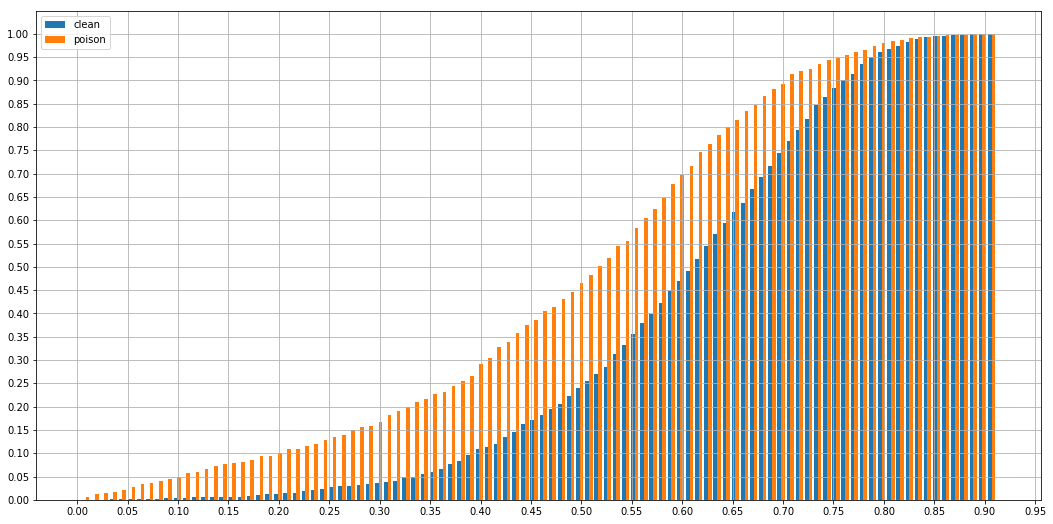

In [55]:
plot_initialize(18,9)
diff_out = plt.hist((clean_model_per_model_label_entropy,poison_model_per_model_label_entropy),
         label=('clean','poison'),bins=100,density=True,cumulative=True)
plt.legend()
plt.yticks(np.arange(0,1.01,0.05))
plt.xticks(np.arange(0,0.96,0.05))
plt.grid()
plt.show()